In [1]:
import tensorflow as tf

In [2]:
len(tf.config.list_physical_devices('GPU'))>0

True

In [3]:
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

## Importing the time-series data

In [4]:
import pandas as pd

df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"],
                 low_memory=True)

In [5]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [7]:
len(df)

2787

In [8]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6529.845141,6513.579485,6710.061683,6302.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,108.584830,108.584830,118.675000,83.328330
25%,460.087500,459.400500,469.720995,450.818830
50%,2780.182500,2772.367500,2874.696250,2696.457500
75%,8506.923720,8496.887593,8763.291985,8221.060570
max,63346.789035,63562.673545,64801.787870,62094.632914


In [9]:
df.isna().sum()

Currency               0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64

In [10]:
df.isna()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,False,False,False,False,False
2013-10-02,False,False,False,False,False
2013-10-03,False,False,False,False,False
2013-10-04,False,False,False,False,False
2013-10-05,False,False,False,False,False
...,...,...,...,...,...
2021-05-14,False,False,False,False,False
2021-05-15,False,False,False,False,False
2021-05-16,False,False,False,False,False


In [11]:
bit_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})

In [12]:
bit_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


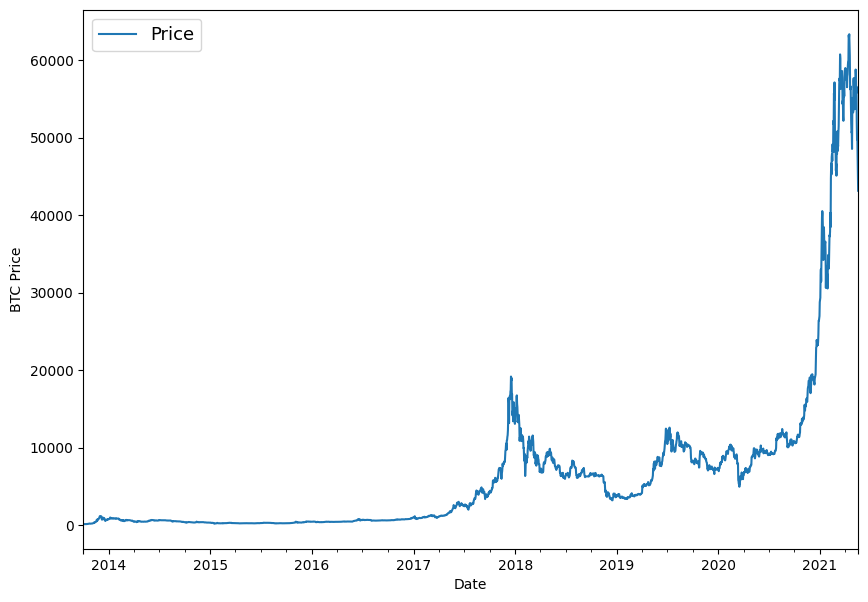

In [13]:
import matplotlib.pyplot as plt
bit_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.legend(fontsize=13)

## Importing the data with Python's CSV module

In [14]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader) # skip the header
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as date not string
        btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

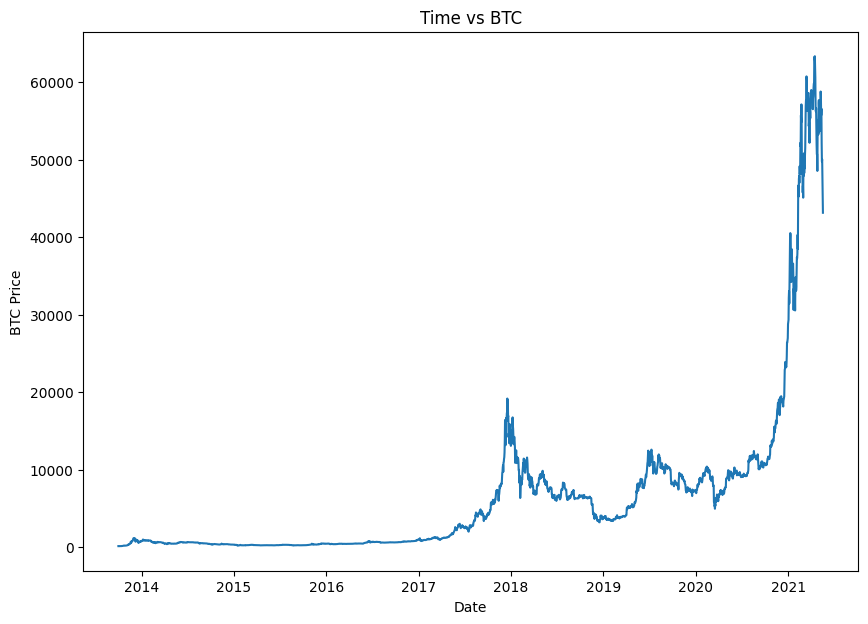

In [15]:
# plot from CSV
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Time vs BTC")
plt.ylabel("BTC Price")
plt.xlabel("Date")

## Format data part 1 : Create train and test sets of the time series data

### Creating train and test sets with time series data (the wrong way)

In [16]:
from sklearn.model_selection import train_test_split
timesteps = bit_prices.index.to_numpy()
prices = bit_prices.Price.to_numpy()
timesteps[:3], prices[:3]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483]))

In [17]:
# Wrong way to make train/test sets for time series data

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

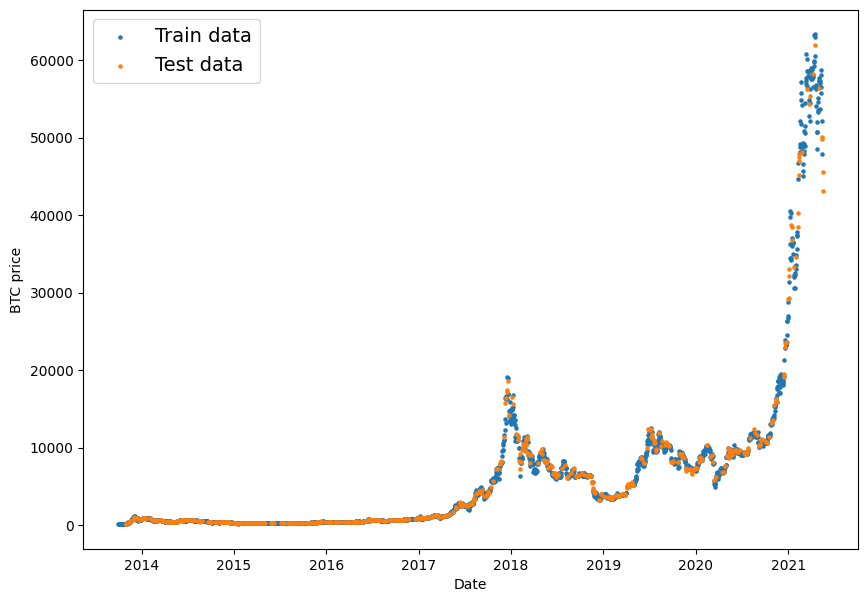

In [18]:
# Plot the wrong train and test split
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.legend(fontsize=14)

### Creating train and test sets with time series data (the right way)

In [19]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

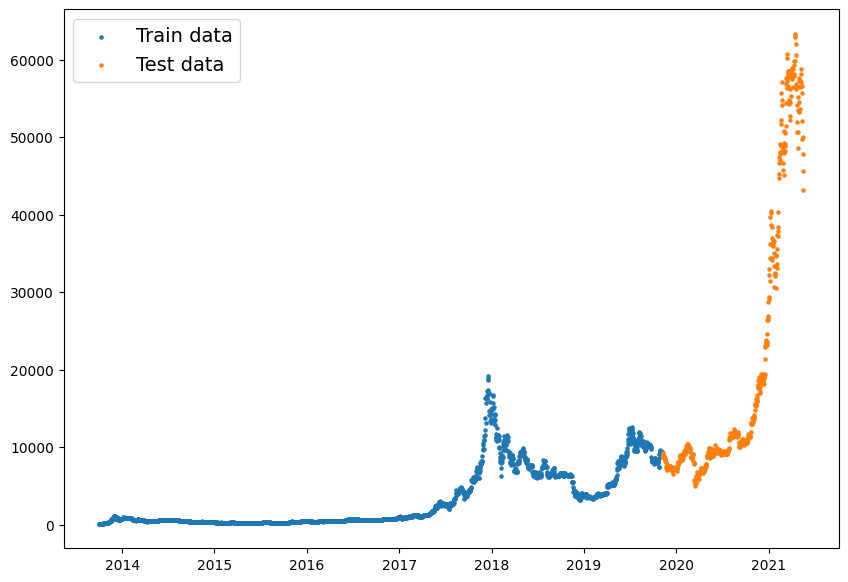

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.legend(fontsize=14)

## Creating a plotting function

In [21]:
def plot_figure(timesteps, values, format="dotted", start=0, end=None, label=None):
    # plt.figure(figsize=(10, 7))
    plt.plot(timesteps[start:end], values[start:end], linestyle=format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    plt.title("Time vs BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

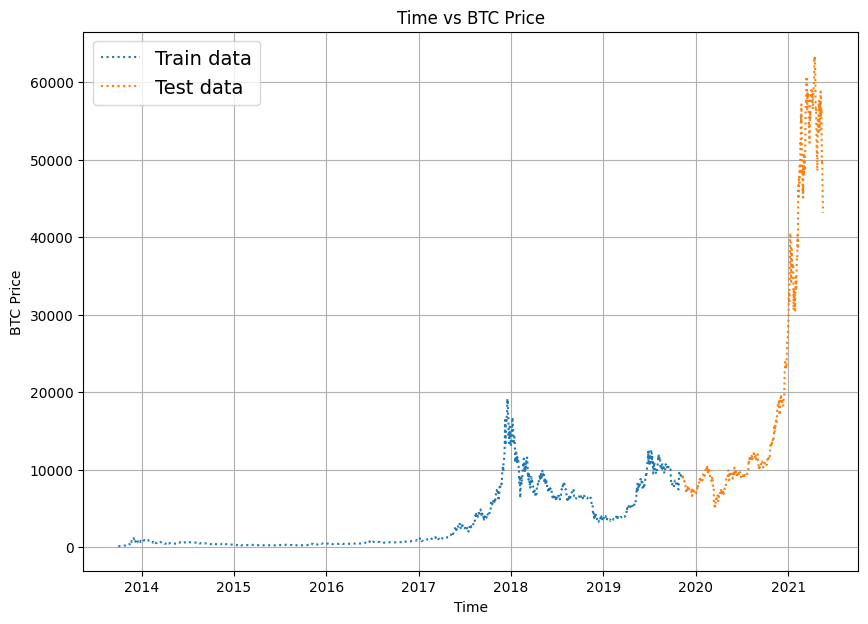

In [22]:
plt.figure(figsize=(10, 7))
plot_figure(X_train, y_train, label="Train data")
plot_figure(X_test, y_test, label="Test data")

## Modelling

### Model 0: Naive forecast (Baseline)

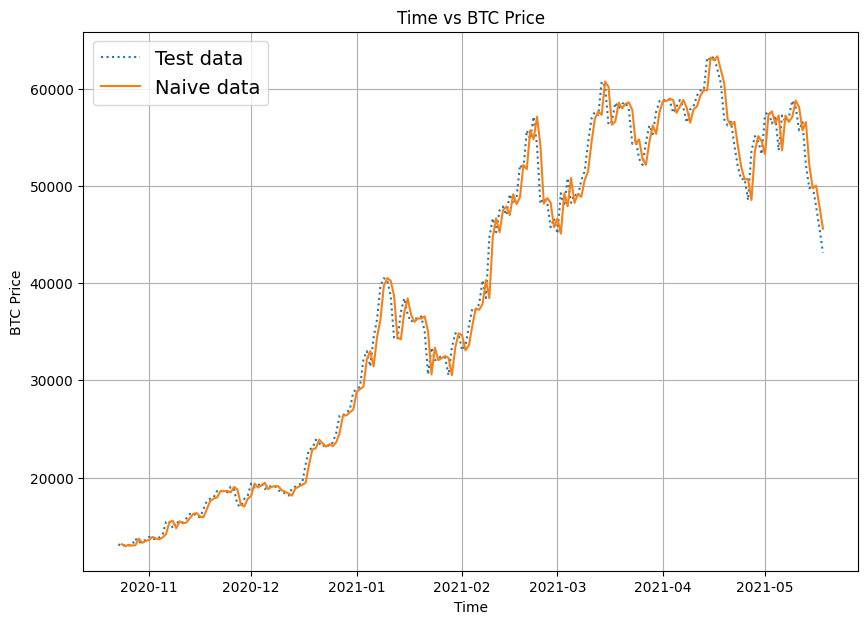

In [23]:
from sklearn.naive_bayes import MultinomialNB
naive_forecast = y_test[:-1]

plt.figure(figsize=(10, 7))
# plot_figure(X_train, y_train, label="Train data")
plot_figure(X_test, y_test, label="Test data", start=350)
plot_figure(X_test[1:], naive_forecast, format="-", label="Naive data", start=350)

## Evaluating a time series model

In [24]:
import tensorflow as tf

In [25]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))
    print(mae)

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # out seasonality is 1 day (hence the shift of 1)
    print(mae_naive_no_season)
    
    return mae / mae_naive_no_season

In [26]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

tf.Tensor(567.9802273457541, shape=(), dtype=float64)
tf.Tensor(568.224567365514, shape=(), dtype=float64)


0.9995699939182624

In [27]:
# Creating a function to make evaluation metrics
def evaluate_model(y_true, y_pred):
    # Make sure dtype is float32
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [28]:
naive_results = evaluate_model(y_test[1:], naive_forecast)
naive_results

tf.Tensor(567.9802, shape=(), dtype=float32)
tf.Tensor(568.22455, shape=(), dtype=float32)


{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [29]:
y_test[-10:], naive_forecast[-10:]

(array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

## Format Data Part 2: Windowing the dataset

```
Windowing for a week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [30]:
print(f" Using: {btc_price[:7]} to predict: {btc_price[7]}")

 Using: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict: 123.033


In [31]:
btc_price[:8]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033]

In [32]:
# Let's setup global variables for window and horizon size
HORIZON = 1
WINDOW_SIZE = 7

In [33]:
def get_labelled_windows(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset.

    E.g. if horizon = 1
    Input = [0, 1, 2, 3, 4, 5, 6, 7] -> Output = ([0, 1, 2, 3, 4, 5, 6], [7])
    """
    return x[:, :-horizon], x[:, -horizon:]

In [34]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [35]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1D array into 2D array of sequential labelled windows of window_size with horizon size labels
    """
    # Create a window of specific window_size
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    print(window_step)

    # Create a 2D array of multiple window steps
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
    print(window_indexes)

    # Index on the target array with 2D array of multuple window steps
    windowed_array = x[window_indexes]
    print(windowed_array)

    # Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=HORIZON)
    return windows, labels

In [36]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

[[0 1 2 3 4 5 6 7]]
[[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [2777 2778 2779 ... 2782 2783 2784]
 [2778 2779 2780 ... 2783 2784 2785]
 [2779 2780 2781 ... 2784 2785 2786]]
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(2780, 2780)

In [37]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [38]:
# import numpy as np
# import tensorflow as tf

# def gpt_make_windows(x, window_size=1, horizon=1):
#     # Create a windowed array
#     windowed_array = [x[i:i + window_size + horizon] for i in range(len(x) - window_size - horizon + 1)]
    
#     # Split the windowed array into inputs and targets
#     inputs = np.array([window[:-horizon] for window in windowed_array])
#     targets = np.array([window[-horizon:] for window in windowed_array])

#     # Create a TensorFlow dataset
#     dataset = tf.data.Dataset.from_tensor_slices((inputs, targets))

#     return dataset

# # Example usage
# x = prices
# window_size = 7
# horizon = 2

# windows_and_labels = gpt_make_windows(x, window_size=window_size, horizon=horizon)

# # Print the batches from the dataset
# for batch in windows_and_labels:
#     inputs, targets = batch
#     print("Inputs:")
#     print(inputs)
#     print("Targets:")
#     print(targets)
#     break  # Print only the first batch for brevity

## Turning windows into training and test sets

In [39]:
def make_train_test_split(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [40]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [41]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [42]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [43]:
len(train_labels), len(y_train)

(2224, 2229)

In [44]:
import datetime

def checkpoint_callback(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=save_path + "/" + model_name,
                                              save_best_only=True,
                                              monitor="val_loss",
                                              verbose=0)

def tensorboard_callback(model_name, save_path="model_logs"):
    log_dir=save_path + "/" + model_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    return tf.keras.callbacks.TensorBoard(log_dir=log_dir)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", 
                                                 min_lr=1e-6, 
                                                 factor=0.1, 
                                                 patience=3)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  patience=5)

## Model 1: Dense model (window = 7, horizon = 1)

In [45]:
from tensorflow.keras import layers
tf.random.set_seed(42)

# inputs = layers.Input(shape=(7,), dtype=tf.float32)
# x = layers.Dense(128, activation="relu")(inputs)
# outputs = layers.Dense(1, activation="linear")(x)

# model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="linear")
], name="model_1_dense")

In [46]:
model_1.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

In [47]:
model_1_history = model_1.fit(x=train_windows,
                              y=train_labels,
                              validation_data=(test_windows, test_labels),
                              epochs=100,
                              verbose=1,
                              callbacks=[reduce_lr, 
                                         tensorboard_callback(model_name="model_1_dense"),
                                         checkpoint_callback(model_name="model_1_dense")])

Epoch 1/100
70/70 [==============================] - 2s 13ms/step - loss: 359.4918 - mae: 359.4918 - mse: 780213.8125 - val_loss: 888.3591 - val_mae: 888.3591 - val_mse: 2606062.2500 - lr: 0.0010
Epoch 2/100
70/70 [==============================] - 1s 10ms/step - loss: 157.8976 - mae: 157.8976 - mse: 131472.6719 - val_loss: 808.7560 - val_mae: 808.7560 - val_mse: 2204985.0000 - lr: 0.0010
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 147.2009 - mae: 147.2009 - mse: 119701.9141 - val_loss: 778.1967 - val_mae: 778.1967 - val_mse: 1912698.5000 - lr: 0.0010
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 139.5047 - mae: 139.5047 - mse: 104214.2734 - val_loss: 761.3698 - val_mae: 761.3698 - val_mse: 1928003.3750 - lr: 0.0010
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 132.6160 - mae: 132.6160 - mse: 97760.8125 - val_loss: 904.0320 - val_mae: 904.0320 - val_mse: 2226177.5000 - lr: 0.0010
Epoch 6/100
70/70 [=====

In [48]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 579.9822 - mae: 579.9822 - mse: 1214938.3750


[579.9822387695312, 579.9822387695312, 1214938.375]

In [49]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 579.7243 - mae: 579.7243 - mse: 1216030.7500


[579.7243041992188, 579.7243041992188, 1216030.75]

In [50]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [51]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [52]:
model_1_preds = make_preds(model_1, test_windows)

In [53]:
model_1_results = evaluate_model(tf.squeeze(test_labels), model_1_preds)
model_1_results

tf.Tensor(579.7243, shape=(), dtype=float32)
tf.Tensor(569.2417, shape=(), dtype=float32)


{'mae': 579.7243,
 'mse': 1216030.6,
 'rmse': 1102.7378,
 'mape': 2.6002777,
 'mase': 1.018415}

In [54]:
len(X_test), len(test_windows), len(X_test[-556:]), -len(test_windows)

(558, 556, 556, -556)

In [55]:
test_labels[:, 0]

array([ 8798.04205463,  9081.18687849,  8711.53433917,  8760.89271814,
        8749.52059102,  8656.97092235,  8500.64355816,  8469.2608989 ,
        8537.33965197,  8205.80636599,  8118.4885358 ,  8074.84317361,
        7612.7405735 ,  7262.11053495,  7303.40575852,  7041.73293642,
        7211.86180875,  7141.06944869,  7523.4806726 ,  7390.20746923,
        7729.26593894,  7542.23560864,  7381.96300782,  7333.43293049,
        7315.36776456,  7213.73376172,  7398.78704961,  7511.88058312,
        7532.12351309,  7550.23919987,  7333.09604316,  7239.76257544,
        7198.06667705,  7190.27236926,  7238.87432299,  7087.02498535,
        7112.73147612,  6883.49639377,  6584.02884335,  7424.01540023,
        7147.56832379,  7139.93337053,  7286.33508116,  7236.98620461,
        7166.17237853,  7235.6266505 ,  7212.80939522,  7183.70653603,
        7227.29371168,  7311.56064392,  7385.46484791,  7251.27679432,
        7179.95781929,  7174.74401195,  6955.48757967,  7291.21950532,
      

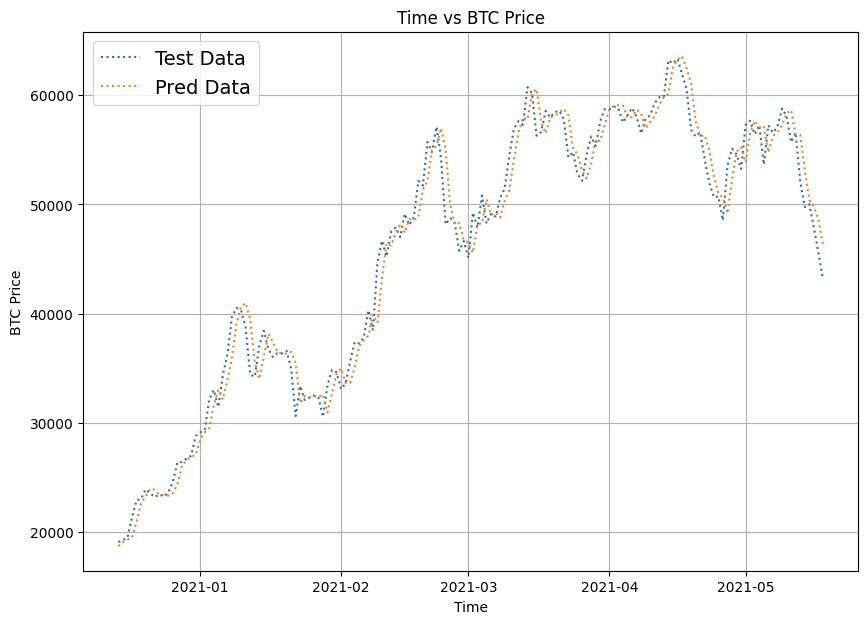

In [56]:
offset = 400
plt.figure(figsize=(10, 7))
plot_figure(timesteps=X_test[-len(test_windows):], 
            values=test_labels[:, 0], 
            start=offset, 
            label="Test Data")

plot_figure(timesteps=X_test[-len(test_windows):],
           values=model_1_preds,
           start=offset,
           label="Pred Data")

## Model 2: Dense (window = 30, horizon = 1)

In [57]:
HORIZON = 1
WINDOW_SIZE = 30

In [58]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
full_windows[:2], full_labels[:2]

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30]]
[[   0    1    2 ...   28   29   30]
 [   1    2    3 ...   29   30   31]
 [   2    3    4 ...   30   31   32]
 ...
 [2754 2755 2756 ... 2782 2783 2784]
 [2755 2756 2757 ... 2783 2784 2785]
 [2756 2757 2758 ... 2784 2785 2786]]
[[  123.65499      125.455        108.58483    ...   192.75666
    197.4          196.02499   ]
 [  125.455        108.58483      118.67466    ...   197.4
    196.02499      198.04883   ]
 [  108.58483      118.67466      121.33866    ...   196.02499
    198.04883      198.93233   ]
 ...
 [63346.78903511 61965.7825981  60574.44472823 ... 49764.1320816
  50032.69313676 47885.62525472]
 [61965.7825981  60574.44472823 56850.83016569 ... 50032.69313676
  47885.62525472 45604.61575361]
 [60574.44472823 56850.83016569 56224.10158771 ... 47885.62525472
  45604.61575361 43144.47129086]]


(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499]]),
 array([[196.02499],
        [198.04883]]))

In [59]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows,
                                                                               labels=full_labels)

len(train_windows), len(test_windows)

(2205, 552)

In [60]:
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [61]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

model_2.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2_history = model_2.fit(x=train_windows,
                              y=train_labels,
                              validation_data=(test_windows, test_labels),
                              epochs=100,
                              batch_size=128,
                              verbose=0,
                              callbacks=[tensorboard_callback(model_name="model_2_dense"), checkpoint_callback(model_name="model_2_dense")])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [62]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 608.9620 - mae: 608.9620 - mse: 1281440.6250


[608.9619750976562, 608.9619750976562, 1281440.625]

In [63]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 608.9620 - mae: 608.9620 - mse: 1281440.6250


[608.9619750976562, 608.9619750976562, 1281440.625]

In [64]:
model_2_preds = make_preds(model_2, test_windows)
model_2_results = evaluate_model(tf.squeeze(test_labels), model_2_preds)
model_2_results

tf.Tensor(608.962, shape=(), dtype=float32)
tf.Tensor(572.07916, shape=(), dtype=float32)


{'mae': 608.962,
 'mse': 1281440.6,
 'rmse': 1132.0073,
 'mape': 2.769341,
 'mase': 1.0644715}

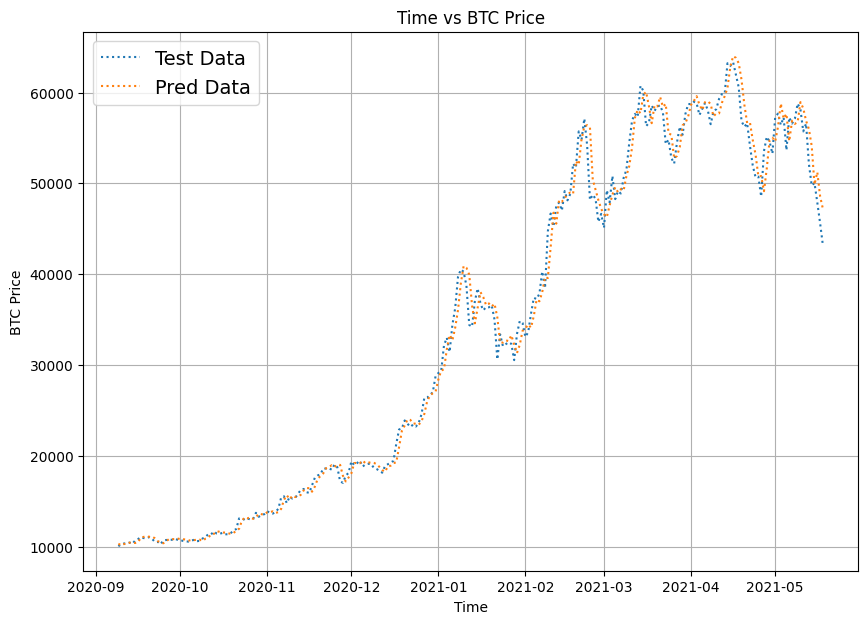

In [65]:
offset = 300
plt.figure(figsize=(10, 7))
plot_figure(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_figure(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, label="Pred Data")

## Model 3: Dense (window = 30, horizon = 7)

In [66]:
HORIZON = 7
WINDOW_SIZE = 30

In [67]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]
[[   0    1    2 ...   34   35   36]
 [   1    2    3 ...   35   36   37]
 [   2    3    4 ...   36   37   38]
 ...
 [2748 2749 2750 ... 2782 2783 2784]
 [2749 2750 2751 ... 2783 2784 2785]
 [2750 2751 2752 ... 2784 2785 2786]]
[[  123.65499      125.455        108.58483    ...   210.3075
    225.02         248.25333   ]
 [  125.455        108.58483      118.67466    ...   225.02
    248.25333      262.32666   ]
 [  108.58483      118.67466      121.33866    ...   248.25333
    262.32666      294.48699   ]
 ...
 [58171.9090187  59295.95004401 59822.90167743 ... 49764.1320816
  50032.69313676 47885.62525472]
 [59295.95004401 59822.90167743 59853.19724227 ... 50032.69313676
  47885.62525472 45604.61575361]
 [59822.90167743 59853.19724227 63223.88439079 ... 47885.62525472
  45604.61575361 43144.47129086]]


In [68]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [69]:
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_3_history = model_3.fit(x=train_windows,
                              y=train_labels,
                              validation_data=(test_windows, test_labels),
                              epochs=100,
                              batch_size=128,
                              verbose=0,
                              callbacks=[tensorboard_callback(model_name=model_3.name), checkpoint_callback(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [70]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1320.6067 - mae: 1320.6067 - mse: 5754424.5000


[1320.606689453125, 1320.606689453125, 5754424.5]

In [71]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1242.6418 - mae: 1242.6418 - mse: 5456083.0000


[1242.641845703125, 1242.641845703125, 5456083.0]

In [72]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds

<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9485.917 ,  9277.82  ,  9514.167 , ...,  9537.9795,  9698.309 ,
         9529.566 ],
       [ 9169.203 ,  8963.615 ,  9130.767 , ...,  9345.581 ,  9396.274 ,
         9285.152 ],
       [ 8948.367 ,  8799.245 ,  8952.812 , ...,  9158.402 ,  9133.359 ,
         9005.138 ],
       ...,
       [58562.996 , 57808.56  , 58626.164 , ..., 59002.61  , 59140.074 ,
        59721.73  ],
       [58366.195 , 57428.246 , 58610.83  , ..., 59876.63  , 60585.72  ,
        59696.83  ],
       [57193.023 , 57173.266 , 57879.523 , ..., 59308.594 , 58977.066 ,
        58375.3   ]], dtype=float32)>

In [73]:
# Creating a function to make evaluation metrics
def evaluate_model(y_true, y_pred):
    # Make sure dtype is float32
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different sized metrics (for longer horizons, need to reduce metrics to a single value)
    if mae.ndim > 0 :
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [74]:
model_3_results = evaluate_model(test_labels, model_3_preds)
model_3_results

tf.Tensor(1242.642, shape=(), dtype=float32)
tf.Tensor(561.97327, shape=(), dtype=float32)


{'mae': 1242.6418,
 'mse': 5456083.5,
 'rmse': 1427.8214,
 'mape': 5.6105304,
 'mase': 2.211212}

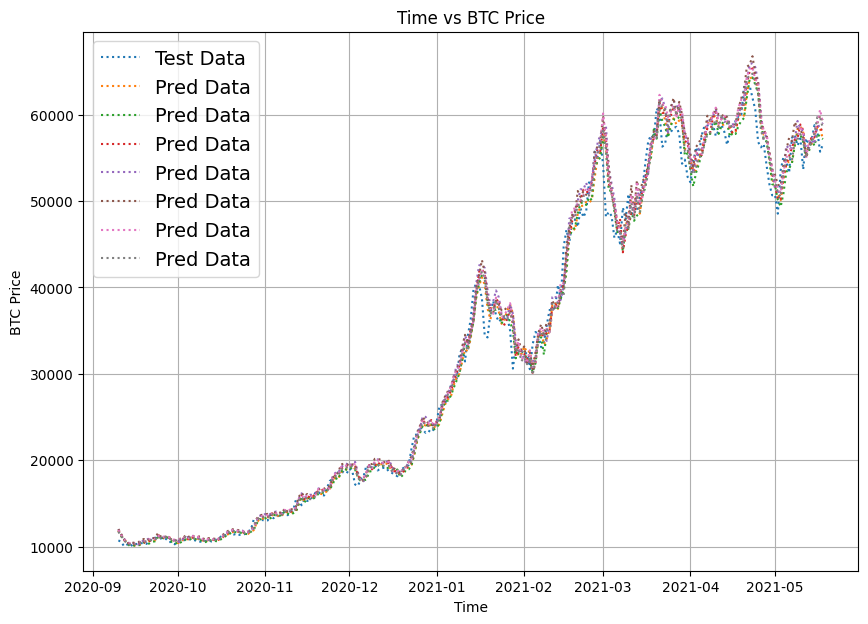

In [75]:
offset = 300
plt.figure(figsize=(10, 7))
plot_figure(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_figure(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="Pred Data")

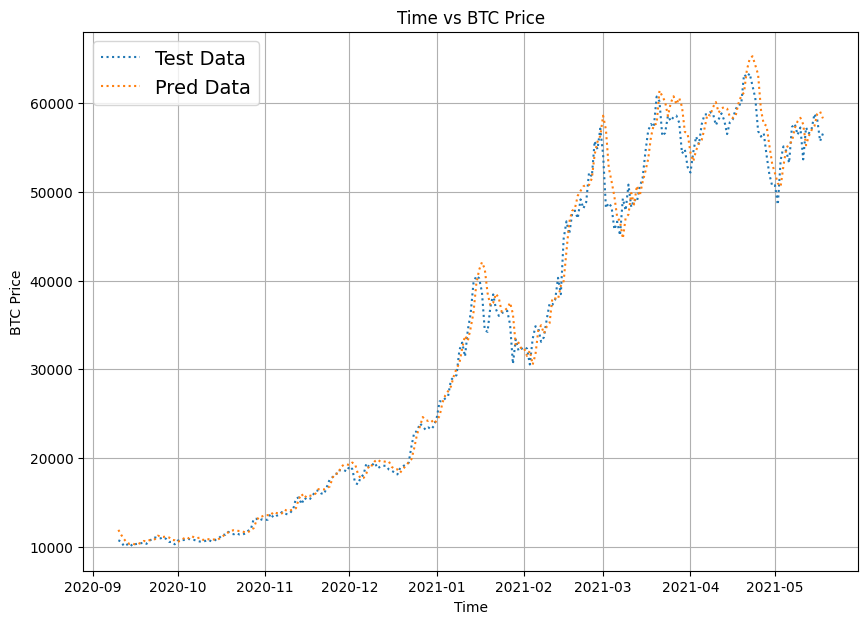

In [76]:
offset = 300
plt.figure(figsize=(10, 7))
plot_figure(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_figure(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, label="Pred Data")

In [77]:
model_results_df = pd.DataFrame({"model_0": naive_results["mae"],
                                "model_1": model_1_results["mae"],
                                "model_2": model_2_results["mae"],
                                "model_3": model_3_results["mae"]}, index=["mae"])

model_results_df = model_results_df.T
model_results_df

,mae
model_0,567.980225
model_1,579.724304
model_2,608.961975
model_3,1242.641846


<Axes: >

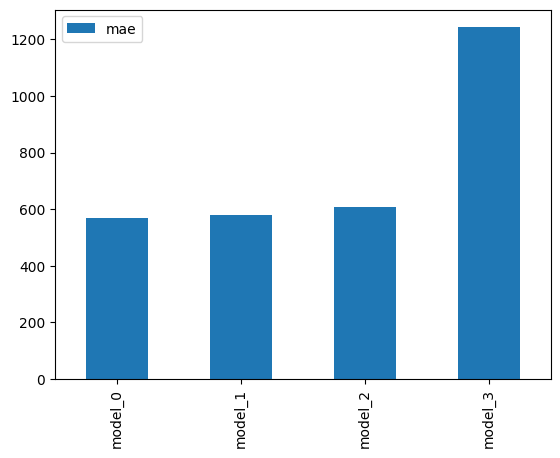

In [78]:
model_results_df.plot.bar()

## Model 4: Conv1D

In [79]:
HORIZON = 1
WINDOW_SIZE = 7

In [80]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

[[0 1 2 3 4 5 6 7]]
[[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [2777 2778 2779 ... 2782 2783 2784]
 [2778 2779 2780 ... 2783 2784 2785]
 [2779 2780 2781 ... 2784 2785 2786]]
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


In [81]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [82]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [83]:
train_windows.shape

(2224, 7)

In [84]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(128, 7, activation="relu", padding="causal"),
    layers.GlobalAveragePooling1D(),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4_history = model_4.fit(train_windows,
                              train_labels,
                              validation_data=(test_windows, test_labels),
                              verbose=0,
                              batch_size=128,
                              epochs=100,
                              callbacks=[tensorboard_callback(model_name=model_4.name), checkpoint_callback(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets wr

In [85]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 7ms/step - loss: 615.6104


615.6104125976562

In [86]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [87]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.7388


570.73876953125

In [88]:
model_4_preds = model_4.predict(test_windows)
model_4_preds

array([[ 8893.429 ],
       [ 8788.889 ],
       [ 9020.289 ],
       [ 8796.401 ],
       [ 8743.089 ],
       [ 8764.086 ],
       [ 8680.324 ],
       [ 8538.849 ],
       [ 8475.116 ],
       [ 8526.65  ],
       [ 8281.838 ],
       [ 8129.738 ],
       [ 8084.423 ],
       [ 7705.759 ],
       [ 7316.242 ],
       [ 7272.737 ],
       [ 7082.5024],
       [ 7153.383 ],
       [ 7158.2495],
       [ 7440.8247],
       [ 7445.7637],
       [ 7667.9263],
       [ 7618.5957],
       [ 7425.9355],
       [ 7356.4272],
       [ 7321.4263],
       [ 7237.3955],
       [ 7358.209 ],
       [ 7500.9966],
       [ 7542.3833],
       [ 7564.619 ],
       [ 7396.5527],
       [ 7264.6807],
       [ 7210.07  ],
       [ 7190.4233],
       [ 7230.0376],
       [ 7125.3057],
       [ 7109.2197],
       [ 6940.438 ],
       [ 6641.9126],
       [ 7237.0024],
       [ 7237.1543],
       [ 7141.862 ],
       [ 7282.012 ],
       [ 7265.4263],
       [ 7195.0327],
       [ 7228.9277],
       [ 7229

In [89]:
test_labels

array([[ 8798.04205463],
       [ 9081.18687849],
       [ 8711.53433917],
       [ 8760.89271814],
       [ 8749.52059102],
       [ 8656.97092235],
       [ 8500.64355816],
       [ 8469.2608989 ],
       [ 8537.33965197],
       [ 8205.80636599],
       [ 8118.4885358 ],
       [ 8074.84317361],
       [ 7612.7405735 ],
       [ 7262.11053495],
       [ 7303.40575852],
       [ 7041.73293642],
       [ 7211.86180875],
       [ 7141.06944869],
       [ 7523.4806726 ],
       [ 7390.20746923],
       [ 7729.26593894],
       [ 7542.23560864],
       [ 7381.96300782],
       [ 7333.43293049],
       [ 7315.36776456],
       [ 7213.73376172],
       [ 7398.78704961],
       [ 7511.88058312],
       [ 7532.12351309],
       [ 7550.23919987],
       [ 7333.09604316],
       [ 7239.76257544],
       [ 7198.06667705],
       [ 7190.27236926],
       [ 7238.87432299],
       [ 7087.02498535],
       [ 7112.73147612],
       [ 6883.49639377],
       [ 6584.02884335],
       [ 7424.01540023],


In [90]:
model_4_results = evaluate_model(test_labels, model_4_preds)
model_4_results

tf.Tensor(570.7387, shape=(), dtype=float32)
tf.Tensor(569.2417, shape=(), dtype=float32)


{'mae': 570.7387,
 'mse': 1183499.9,
 'rmse': 570.7387,
 'mape': 2.54612,
 'mase': 1.0026299}

## Model 5: LSTM

In [91]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(7,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(1)(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5_lstm")

In [92]:
model_5.summary()

Model: "model_5_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [93]:
tf.get_logger().setLevel('ERROR')

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5_history = model_5.fit(train_windows,
                              train_labels,
                              validation_data=(test_windows, test_labels),
                              epochs=100,
                              batch_size=128,
                              callbacks=[tensorboard_callback(model_name=model_5.name), checkpoint_callback(model_name=model_5.name)])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 2439.7700

18/18 [==============================] - 3s 105ms/step - loss: 2323.6077 - val_loss: 9222.6221
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 695.4739 

18/18 [==============================] - 2s 105ms/step - loss: 695.4739 - val_loss: 1486.0378
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 270.4786

18/18 [==============================] - 2s 95ms/step - loss: 237.3842 - val_loss: 1298.9087
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 181.9185

18/18 [==============================] - 2s 96ms/step - loss: 181.9185 - val_loss: 966.6432
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 173.4023 - val_loss: 970.9296
Epoch 6/100
18/18 [==============================] - 0s 11ms/step - loss: 173.3822 - val_loss: 981.0975
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 177.9374

18/18 [==============================] - 2s 118ms/step - loss: 171.9762 - val_loss: 921.8434
Epoch 8/100
10/18 [===============>..............] - ETA: 0s - loss: 162.4161

18/18 [==============================] - 2s 91ms/step - loss: 165.5515 - val_loss: 900.0497
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 160.4305

18/18 [==============================] - 2s 93ms/step - loss: 160.4305 - val_loss: 853.6299
Epoch 10/100
18/18 [==============================] - 0s 10ms/step - loss: 168.6475 - val_loss: 931.5431
Epoch 11/100
18/18 [==============================] - 0s 10ms/step - loss: 169.2183 - val_loss: 926.0713
Epoch 12/100
18/18 [==============================] - 0s 10ms/step - loss: 166.3748 - val_loss: 916.8346
Epoch 13/100
18/18 [==============================] - 0s 10ms/step - loss: 166.8522 - val_loss: 909.6310
Epoch 14/100
18/18 [==============================] - 0s 11ms/step - loss: 161.6482 - val_loss: 866.7496
Epoch 15/100
18/18 [==============================] - 0s 13ms/step - loss: 155.9960 - val_loss: 896.1780
Epoch 16/100
18/18 [==============================] - 0s 11ms/step - loss: 159.4309 - val_loss: 882.4391
Epoch 17/100
18/18 [==============================] - 0s 20ms/step - loss: 157.7812 - val_loss: 956.9371
Epoch 18/100
18/18 [==============================] - 0s 21ms/step -

18/18 [==============================] - 2s 111ms/step - loss: 150.1062 - val_loss: 844.7767
Epoch 23/100
18/18 [==============================] - 0s 11ms/step - loss: 149.1968 - val_loss: 861.0685
Epoch 24/100
18/18 [==============================] - 0s 11ms/step - loss: 147.1761 - val_loss: 848.1241
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 146.2322

18/18 [==============================] - 2s 130ms/step - loss: 145.5848 - val_loss: 840.6231
Epoch 26/100
16/18 [=========================>....] - ETA: 0s - loss: 146.0922

18/18 [==============================] - 2s 123ms/step - loss: 145.0945 - val_loss: 813.1295
Epoch 27/100
13/18 [====================>.........] - ETA: 0s - loss: 147.1368

18/18 [==============================] - 2s 113ms/step - loss: 143.2227 - val_loss: 805.5842
Epoch 28/100
16/18 [=========================>....] - ETA: 0s - loss: 140.6756

18/18 [==============================] - 2s 99ms/step - loss: 141.6531 - val_loss: 785.5984
Epoch 29/100
18/18 [==============================] - 0s 9ms/step - loss: 140.8680 - val_loss: 801.3979
Epoch 30/100
18/18 [==============================] - 0s 9ms/step - loss: 141.3804 - val_loss: 791.8160
Epoch 31/100
18/18 [==============================] - ETA: 0s - loss: 138.0144

18/18 [==============================] - 2s 111ms/step - loss: 138.0144 - val_loss: 768.1625
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 136.7726

18/18 [==============================] - 2s 93ms/step - loss: 135.9883 - val_loss: 764.0204
Epoch 33/100
18/18 [==============================] - 0s 10ms/step - loss: 136.6867 - val_loss: 791.4828
Epoch 34/100
16/18 [=========================>....] - ETA: 0s - loss: 136.3448

18/18 [==============================] - 2s 95ms/step - loss: 136.4118 - val_loss: 750.6531
Epoch 35/100
18/18 [==============================] - 0s 10ms/step - loss: 133.7257 - val_loss: 754.5988
Epoch 36/100
16/18 [=========================>....] - ETA: 0s - loss: 132.6162

18/18 [==============================] - 2s 110ms/step - loss: 133.4312 - val_loss: 734.5640
Epoch 37/100
18/18 [==============================] - 0s 9ms/step - loss: 131.2189 - val_loss: 747.5995
Epoch 38/100
15/18 [========================>.....] - ETA: 0s - loss: 131.4746

18/18 [==============================] - 2s 95ms/step - loss: 129.7771 - val_loss: 718.2686
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 129.4270

18/18 [==============================] - 2s 97ms/step - loss: 129.4270 - val_loss: 716.9465
Epoch 40/100
18/18 [==============================] - 0s 9ms/step - loss: 130.6303 - val_loss: 728.0188
Epoch 41/100
16/18 [=========================>....] - ETA: 0s - loss: 129.6394

18/18 [==============================] - 2s 94ms/step - loss: 127.6953 - val_loss: 701.7618
Epoch 42/100
18/18 [==============================] - 0s 10ms/step - loss: 126.2242 - val_loss: 706.0325
Epoch 43/100
14/18 [======================>.......] - ETA: 0s - loss: 123.0385

18/18 [==============================] - 2s 121ms/step - loss: 125.7488 - val_loss: 693.8345
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 126.6271

18/18 [==============================] - 2s 98ms/step - loss: 125.5652 - val_loss: 689.3698
Epoch 45/100
10/18 [===============>..............] - ETA: 0s - loss: 126.5415

18/18 [==============================] - 2s 94ms/step - loss: 123.4030 - val_loss: 682.0648
Epoch 46/100
16/18 [=========================>....] - ETA: 0s - loss: 125.4482

18/18 [==============================] - 2s 96ms/step - loss: 124.5756 - val_loss: 679.0645
Epoch 47/100
18/18 [==============================] - 0s 11ms/step - loss: 122.3864 - val_loss: 700.8399
Epoch 48/100
17/18 [===========================>..] - ETA: 0s - loss: 122.3661

18/18 [==============================] - 2s 109ms/step - loss: 122.4737 - val_loss: 676.0283
Epoch 49/100
18/18 [==============================] - 0s 11ms/step - loss: 122.0582 - val_loss: 690.3026
Epoch 50/100
18/18 [==============================] - 0s 10ms/step - loss: 124.1240 - val_loss: 714.4885
Epoch 51/100
18/18 [==============================] - 0s 10ms/step - loss: 125.1230 - val_loss: 778.5692
Epoch 52/100
17/18 [===========================>..] - ETA: 0s - loss: 123.8937

18/18 [==============================] - 2s 95ms/step - loss: 123.6763 - val_loss: 660.4346
Epoch 53/100
18/18 [==============================] - ETA: 0s - loss: 119.8259

18/18 [==============================] - 2s 93ms/step - loss: 119.8259 - val_loss: 659.2103
Epoch 54/100
16/18 [=========================>....] - ETA: 0s - loss: 121.2453

18/18 [==============================] - 2s 95ms/step - loss: 120.3732 - val_loss: 654.3164
Epoch 55/100
13/18 [====================>.........] - ETA: 0s - loss: 125.6378

18/18 [==============================] - 2s 111ms/step - loss: 118.6429 - val_loss: 648.6450
Epoch 56/100
14/18 [======================>.......] - ETA: 0s - loss: 121.4990

18/18 [==============================] - 2s 104ms/step - loss: 120.1063 - val_loss: 645.4896
Epoch 57/100
18/18 [==============================] - 0s 11ms/step - loss: 123.7777 - val_loss: 680.8215
Epoch 58/100
14/18 [======================>.......] - ETA: 0s - loss: 118.2437

18/18 [==============================] - 2s 98ms/step - loss: 118.7787 - val_loss: 641.7518
Epoch 59/100
16/18 [=========================>....] - ETA: 0s - loss: 117.7180

18/18 [==============================] - 2s 94ms/step - loss: 117.9966 - val_loss: 641.0961
Epoch 60/100
18/18 [==============================] - 0s 11ms/step - loss: 118.3239 - val_loss: 643.4174
Epoch 61/100
18/18 [==============================] - 0s 11ms/step - loss: 118.6151 - val_loss: 696.0721
Epoch 62/100
18/18 [==============================] - 0s 10ms/step - loss: 122.4420 - val_loss: 749.9855
Epoch 63/100
18/18 [==============================] - 0s 10ms/step - loss: 123.8672 - val_loss: 660.2910
Epoch 64/100
18/18 [==============================] - 0s 11ms/step - loss: 117.0016 - val_loss: 687.4307
Epoch 65/100
14/18 [======================>.......] - ETA: 0s - loss: 120.7572

18/18 [==============================] - 2s 111ms/step - loss: 119.8755 - val_loss: 632.8752
Epoch 66/100
18/18 [==============================] - 0s 11ms/step - loss: 117.1110 - val_loss: 640.7438
Epoch 67/100
14/18 [======================>.......] - ETA: 0s - loss: 120.0523

18/18 [==============================] - 2s 99ms/step - loss: 117.9292 - val_loss: 626.2725
Epoch 68/100
15/18 [========================>.....] - ETA: 0s - loss: 118.8637

18/18 [==============================] - 2s 97ms/step - loss: 117.1456 - val_loss: 625.1245
Epoch 69/100
18/18 [==============================] - 0s 12ms/step - loss: 119.3027 - val_loss: 625.7104
Epoch 70/100
15/18 [========================>.....] - ETA: 0s - loss: 113.1244

18/18 [==============================] - 2s 109ms/step - loss: 114.9086 - val_loss: 621.8661
Epoch 71/100
18/18 [==============================] - 0s 11ms/step - loss: 115.1822 - val_loss: 654.4707
Epoch 72/100
18/18 [==============================] - 0s 11ms/step - loss: 119.3393 - val_loss: 632.7345
Epoch 73/100
18/18 [==============================] - 0s 12ms/step - loss: 115.7310 - val_loss: 627.1373
Epoch 74/100
18/18 [==============================] - 0s 11ms/step - loss: 115.2199 - val_loss: 625.5247
Epoch 75/100
18/18 [==============================] - 0s 10ms/step - loss: 115.5961 - val_loss: 647.6739
Epoch 76/100
17/18 [===========================>..] - ETA: 0s - loss: 114.5366

18/18 [==============================] - 2s 102ms/step - loss: 114.7675 - val_loss: 617.0222
Epoch 77/100
18/18 [==============================] - 0s 11ms/step - loss: 116.8673 - val_loss: 666.9280
Epoch 78/100
18/18 [==============================] - 0s 11ms/step - loss: 117.1996 - val_loss: 627.6133
Epoch 79/100
16/18 [=========================>....] - ETA: 0s - loss: 115.4388

18/18 [==============================] - 2s 103ms/step - loss: 113.5704 - val_loss: 611.2637
Epoch 80/100
18/18 [==============================] - 0s 18ms/step - loss: 113.2127 - val_loss: 621.4436
Epoch 81/100
18/18 [==============================] - 0s 16ms/step - loss: 113.3850 - val_loss: 631.9078
Epoch 82/100
18/18 [==============================] - ETA: 0s - loss: 116.0263

18/18 [==============================] - 2s 103ms/step - loss: 116.0263 - val_loss: 610.8793
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 113.4978 - val_loss: 631.0351
Epoch 84/100
18/18 [==============================] - 0s 11ms/step - loss: 114.4766 - val_loss: 620.5226
Epoch 85/100
18/18 [==============================] - 0s 11ms/step - loss: 114.3218 - val_loss: 640.3288
Epoch 86/100
18/18 [==============================] - 0s 11ms/step - loss: 115.0620 - val_loss: 614.5500
Epoch 87/100
17/18 [===========================>..] - ETA: 0s - loss: 113.0530

18/18 [==============================] - 2s 106ms/step - loss: 112.4946 - val_loss: 609.2250
Epoch 88/100
17/18 [===========================>..] - ETA: 0s - loss: 112.2514

18/18 [==============================] - 2s 92ms/step - loss: 112.1963 - val_loss: 603.8983
Epoch 89/100
18/18 [==============================] - 0s 10ms/step - loss: 112.1124 - val_loss: 629.1746
Epoch 90/100
18/18 [==============================] - 0s 11ms/step - loss: 116.6988 - val_loss: 645.2277
Epoch 91/100
18/18 [==============================] - 0s 10ms/step - loss: 115.3321 - val_loss: 626.2292
Epoch 92/100
18/18 [==============================] - 0s 11ms/step - loss: 113.3265 - val_loss: 612.6552
Epoch 93/100
15/18 [========================>.....] - ETA: 0s - loss: 116.3512

18/18 [==============================] - 2s 94ms/step - loss: 113.0708 - val_loss: 599.9893
Epoch 94/100
18/18 [==============================] - 0s 11ms/step - loss: 111.2166 - val_loss: 600.3155
Epoch 95/100
15/18 [========================>.....] - ETA: 0s - loss: 110.8813

18/18 [==============================] - 2s 95ms/step - loss: 111.1020 - val_loss: 598.2369
Epoch 96/100
18/18 [==============================] - 0s 12ms/step - loss: 112.3853 - val_loss: 605.4749
Epoch 97/100
18/18 [==============================] - 0s 11ms/step - loss: 111.6455 - val_loss: 625.0032
Epoch 98/100
18/18 [==============================] - 0s 11ms/step - loss: 112.1201 - val_loss: 600.1553
Epoch 99/100
18/18 [==============================] - 0s 11ms/step - loss: 110.9818 - val_loss: 598.9257
Epoch 100/100
16/18 [=========================>....] - ETA: 0s - loss: 115.8056

18/18 [==============================] - 2s 113ms/step - loss: 112.5498 - val_loss: 597.4623


In [94]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 597.4624


597.46240234375

In [95]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 597.4624


597.46240234375

In [96]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8992.637, 8824.648, 9010.125, 8848.681, 8743.077], dtype=float32)>

In [97]:
model_5_results = evaluate_model(tf.squeeze(test_labels), model_5_preds)
model_5_results

tf.Tensor(597.46234, shape=(), dtype=float32)
tf.Tensor(569.2417, shape=(), dtype=float32)


{'mae': 597.46234,
 'mse': 1275416.0,
 'rmse': 1129.3431,
 'mape': 2.6910973,
 'mase': 1.0495758}

## Make a multivariate time series dataset

- Bitcoin halving events

In [98]:
bit_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [99]:
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [100]:
block_reward_2_days = (block_reward_3_datetime - bit_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bit_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [101]:
bit_prices_block = bit_prices.copy()
bit_prices_block["block_reward"] = None

bit_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2

In [102]:
bit_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,None
2021-05-15,50032.693137,None
2021-05-16,47885.625255,None


In [103]:
bit_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bit_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bit_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

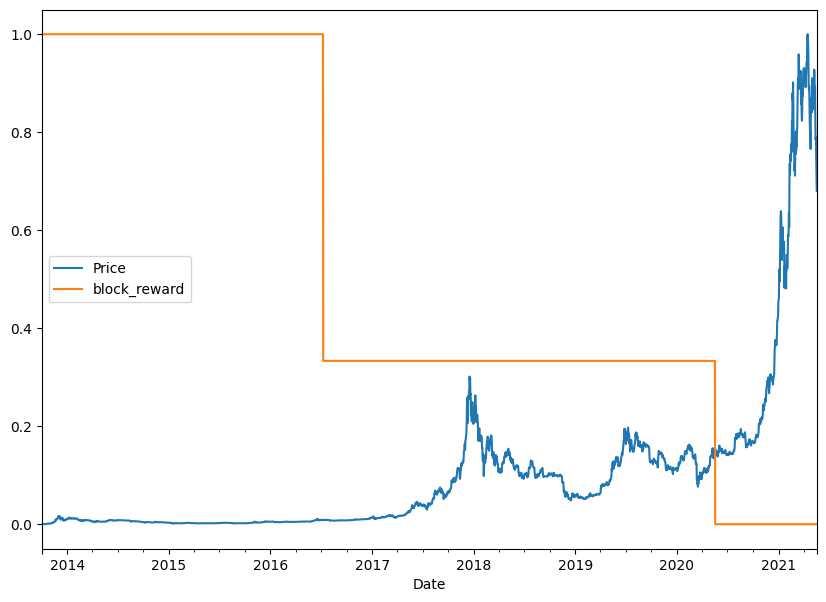

In [104]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bit_prices_block[["Price", "block_reward"]]),
                                     columns=bit_prices_block.columns,
                                     index=bit_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7))

## Making a windowed dataset with pandas

In [105]:
HORIZON = 1
WINDOW_SIZE = 7

In [106]:
bit_prices_windowed = bit_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
    bit_prices_windowed[f"Price_{i+1}"] = bit_prices_windowed["Price"].shift(periods=i+1)
bit_prices_windowed.head(10)

,Price,block_reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [107]:
x = bit_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bit_prices_windowed.dropna()["Price"].astype(np.float32)
x.head()

,block_reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [108]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [109]:
split_size = int(len(x) * 0.8)

X_train, y_train = x[:split_size], y[:split_size]
X_test, y_test = x[split_size:], y[split_size:]

In [110]:
len(X_train), len(X_test)

(2224, 556)

## Model 6: with Multivariate Data

In [111]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(8,), dtype=tf.float32)
x = layers.Dense(128, activation="relu")(inputs)
outputs = layers.Dense(1, activation="linear")(x)

model_6 = tf.keras.Model(inputs, outputs, name="model_6_multivariate")

In [112]:
X_train = tf.constant(X_train.to_numpy())
X_test = tf.constant(X_test.to_numpy())
y_train = tf.constant(y_train.to_numpy())
y_test = tf.constant(y_test.to_numpy())

In [113]:
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6_history = model_6.fit(X_train,
                              y_train,
                              validation_data=(X_test, y_test),
                              epochs=100,
                              batch_size=128,
                              callbacks=[tensorboard_callback(model_name=model_6.name), checkpoint_callback(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 32ms/step - loss: 1234.6805 - val_loss: 2061.9075
Epoch 2/100
18/18 [==============================] - 0s 29ms/step - loss: 351.5054 - val_loss: 1908.6731
Epoch 3/100
18/18 [==============================] - 0s 28ms/step - loss: 235.4153 - val_loss: 1329.0583
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 208.6112 - val_loss: 1102.1342
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 196.5770 - val_loss: 1107.8473
Epoch 6/100
18/18 [==============================] - 0s 28ms/step - loss: 187.2244 - val_loss: 1036.1720
Epoch 7/100
18/18 [==============================] - 0s 28ms/step - loss: 182.0246 - val_loss: 1019.2927
Epoch 8/100
18/18 [==============================] - 0s 27ms/step - loss: 175.7059 - val_loss: 977.8487
Epoch 9/100
18/18 [==============================] - 0s 28ms/step - loss: 170.1784 - val_loss: 954.4036
Epoch 10/100
18/18 [==============================] - 1s 

In [114]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 639.6246


639.6245727539062

In [115]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 568.0360


568.0360107421875

In [116]:
model_6_preds = make_preds(model_6, X_test)
model_6_results = evaluate_model(y_test, model_6_preds)
model_6_results

tf.Tensor(568.03595, shape=(), dtype=float32)
tf.Tensor(569.2417, shape=(), dtype=float32)


{'mae': 568.03595,
 'mse': 1166216.0,
 'rmse': 1079.9148,
 'mape': 2.546599,
 'mase': 0.9978818}

In [117]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Challenge 1

In [118]:
inputs = layers.Input(shape=(8,), dtype=tf.float32)
x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)

model_6_1 = tf.keras.Model(inputs, outputs, name="model_6_multivariate_1")

model_6_1.compile(loss="mae",
                  optimizer=tf.keras.optimizers.Adam())

model_6_1_history = model_6_1.fit(X_train,
                                  y_train,
                                  validation_data=(X_test, y_test),
                                  epochs=100,
                                  batch_size=128,
                                  callbacks=[tensorboard_callback(model_name=model_6_1.name),
                                             checkpoint_callback(model_name=model_6_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 36ms/step - loss: 1230.1628 - val_loss: 1344.5167
Epoch 2/100
18/18 [==============================] - 1s 31ms/step - loss: 296.4168 - val_loss: 1142.0236
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 220.4277 - val_loss: 1469.4508
Epoch 4/100
18/18 [==============================] - 1s 32ms/step - loss: 191.3448 - val_loss: 1088.8451
Epoch 5/100
18/18 [==============================] - 1s 31ms/step - loss: 163.7445 - val_loss: 844.7396
Epoch 6/100
18/18 [==============================] - 1s 32ms/step - loss: 146.4976 - val_loss: 773.0532
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 137.4026 - val_loss: 913.5131
Epoch 8/100
18/18 [==============================] - 1s 43ms/step - loss: 135.2625 - val_loss: 694.9543
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 125.5545 - val_loss: 850.1898
Epoch 10/100
18/18 [==============================] - 0s 7ms/s

In [119]:
model_6_1.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 570.5410


570.5409545898438

In [120]:
model_6_1 = tf.keras.models.load_model("model_experiments/model_6_multivariate_1")
model_6_1.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.5503


567.55029296875

In [121]:
model_6_1_preds = make_preds(model_6_1, X_test)
model_6_1_results = evaluate_model(y_test, model_6_1_preds)
model_6_1_results

tf.Tensor(567.55023, shape=(), dtype=float32)
tf.Tensor(569.2417, shape=(), dtype=float32)


{'mae': 567.55023,
 'mse': 1166811.0,
 'rmse': 1080.1902,
 'mape': 2.5633762,
 'mase': 0.9970286}

In [122]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Challenge 2

In [123]:
bit_prices_windowed

,Price,block_reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [124]:
price_feature = bit_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).astype(np.float32)
block_feature = bit_prices_windowed.dropna()["block_reward"].astype(np.float32)
target = bit_prices_windowed.dropna()["Price"].astype(np.float32)

In [125]:
len(price_feature), len(block_feature), len(target)

(2780, 2780, 2780)

In [126]:
split_size = int(0.8 * len(price_feature))

price_train, block_train, target_train = price_feature[:split_size].to_numpy(), block_feature[:split_size].to_numpy(), target[:split_size].to_numpy()
price_test, block_test, target_test = price_feature[split_size:].to_numpy(), block_feature[split_size:].to_numpy(), target[split_size:].to_numpy()

In [127]:
len(price_train), len(block_train), len(target_train)

(2224, 2224, 2224)

In [128]:
len(price_test), len(block_test), len(target_test)

(556, 556, 556)

In [129]:
price_block_train = tf.data.Dataset.from_tensor_slices((tf.constant(price_train), tf.constant(block_train)))
target_train = tf.data.Dataset.from_tensor_slices(tf.constant(target_train))
train_dataset = tf.data.Dataset.zip((price_block_train, target_train)).batch(128).prefetch(tf.data.AUTOTUNE)

price_block_test = tf.data.Dataset.from_tensor_slices((tf.constant(price_test), tf.constant(block_test)))
target_test = tf.data.Dataset.from_tensor_slices(tf.constant(target_test))
test_dataset = tf.data.Dataset.zip((price_block_test, target_test)).batch(128).prefetch(tf.data.AUTOTUNE)

In [130]:
price_inputs = layers.Input(shape=(7,), dtype=tf.float32)
x = layers.Dense(128, activation="relu")(price_inputs)
price_outputs = layers.Dense(128, activation="relu")(x)
price_model = tf.keras.Model(price_inputs, price_outputs, name="price_model")

block_inputs = layers.Input(shape=(1,), dtype=tf.float32)
y = layers.Dense(128, activation="relu")(block_inputs)
block_outputs = layers.Dense(128, activation="relu")(y)
block_model = tf.keras.Model(block_inputs, block_outputs, name="block_model")

price_block_inputs = layers.Concatenate(name="price_block_hybrid")([price_model.output, block_model.output])

combined_dropout_1 = layers.Dropout(0.5)(price_block_inputs)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout_1)
combined_dropout_2 = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(1, activation="linear")(combined_dropout_2)

model_6_2 = tf.keras.Model(inputs=[price_model.input, block_model.input], outputs=output_layer, name="model_6_multivariate_2")

In [131]:
model_6_2.summary()

Model: "model_6_multivariate_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 7)]          0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 128)          1024        ['input_4[0][0]']                
                                                                                                  
 dense_15 (Dense)               (None, 128)          256         ['input_5[0][0]']                
                                                                             

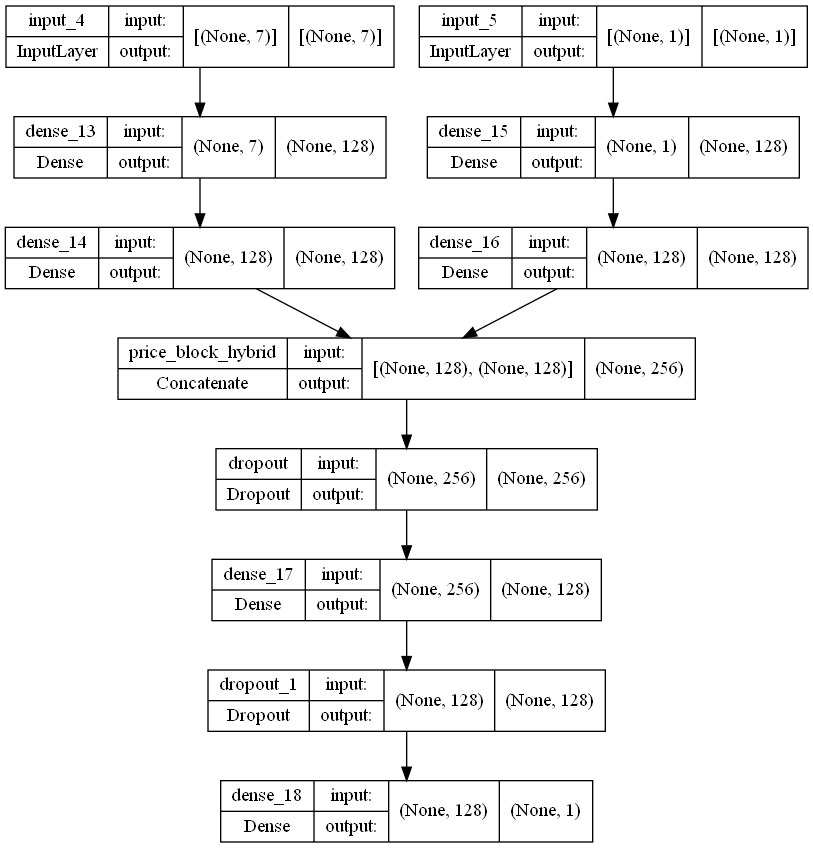

In [132]:
tf.keras.utils.plot_model(model_6_2, show_shapes=True)

In [133]:
len(train_dataset), len(test_dataset)

(18, 5)

In [134]:
model_6_2.compile(loss="mae",
                  optimizer=tf.keras.optimizers.Adam())

model_6_2_history = model_6_2.fit(train_dataset,
                                  validation_data=test_dataset,
                                  steps_per_epoch=len(train_dataset),
                                  validation_steps=len(test_dataset),
                                  epochs=100,
                                  callbacks=[tensorboard_callback(model_name=model_6_2.name), 
                                             checkpoint_callback(model_name=model_6_2.name)])

Epoch 1/100
18/18 [==============================] - 2s 77ms/step - loss: 802.4464 - val_loss: 3066.9055
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 665.3703 - val_loss: 3374.0640
Epoch 3/100
18/18 [==============================] - 0s 9ms/step - loss: 680.1642 - val_loss: 5265.7563
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 633.5506 - val_loss: 5631.0073
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 629.2454 - val_loss: 6098.2109
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 533.7208 - val_loss: 4468.5117
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 535.8323 - val_loss: 4735.7637
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 550.6017 - val_loss: 4021.9092
Epoch 9/100
18/18 [==============================] - 1s 61ms/step - loss: 622.1714 - val_loss: 2892.9299
Epoch 10/100
18/18 [==============================] - 1s 60ms/

In [135]:
model_6_2.evaluate(test_dataset)

5/5 [==============================] - 0s 3ms/step - loss: 4660.3667


4660.36669921875

In [136]:
model_6_2 = tf.keras.models.load_model("model_experiments/model_6_multivariate_2")
model_6_2.evaluate(test_dataset)

5/5 [==============================] - 0s 3ms/step - loss: 701.5308


701.5308227539062

In [137]:
model_6_2_preds = make_preds(model_6_2, test_dataset)
model_6_2_preds

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 9189.231 ,  9008.921 ,  9091.845 ,  9041.093 ,  8890.91  ,
        8854.184 ,  8883.748 ,  8728.186 ,  8631.725 ,  8654.237 ,
        8517.371 ,  8334.206 ,  8239.755 ,  8030.1436,  7649.3267,
        7478.211 ,  7344.565 ,  7277.889 ,  7244.054 ,  7440.613 ,
        7495.0537,  7649.2065,  7669.7456,  7615.171 ,  7490.283 ,
        7478.954 ,  7412.593 ,  7419.172 ,  7536.3193,  7612.671 ,
        7615.455 ,  7555.4224,  7446.838 ,  7364.322 ,  7341.059 ,
        7331.256 ,  7266.6196,  7227.0566,  7116.3496,  6904.6284,
        7126.965 ,  7331.795 ,  7262.3965,  7222.4614,  7401.426 ,
        7329.423 ,  7297.955 ,  7342.551 ,  7324.224 ,  7311.586 ,
        7376.8115,  7445.6304,  7415.8643,  7341.5835,  7306.514 ,
        7209.7876,  7259.714 ,  7380.3315,  7443.9893,  7566.863 ,
        7913.2334,  8087.5347,  7987.3647,  8056.174 ,  8197.964 ,
        8253.497 ,  8209.19  ,  8516.029 ,  8810.459 ,  8844.615 ,
        8861.4

In [138]:
y_test

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8798.042 ,  9081.187 ,  8711.534 ,  8760.893 ,  8749.5205,
        8656.971 ,  8500.644 ,  8469.261 ,  8537.34  ,  8205.807 ,
        8118.489 ,  8074.8433,  7612.7407,  7262.1104,  7303.406 ,
        7041.733 ,  7211.862 ,  7141.0693,  7523.4805,  7390.2075,
        7729.266 ,  7542.236 ,  7381.963 ,  7333.433 ,  7315.3677,
        7213.734 ,  7398.787 ,  7511.8804,  7532.1235,  7550.2393,
        7333.096 ,  7239.7627,  7198.067 ,  7190.2725,  7238.8745,
        7087.025 ,  7112.7314,  6883.4966,  6584.029 ,  7424.0156,
        7147.5684,  7139.9336,  7286.335 ,  7236.9863,  7166.1724,
        7235.6265,  7212.8096,  7183.7065,  7227.294 ,  7311.5605,
        7385.465 ,  7251.277 ,  7179.958 ,  7174.744 ,  6955.488 ,
        7291.2197,  7337.6367,  7347.433 ,  7713.861 ,  8039.6035,
        8067.6064,  7808.701 ,  8087.453 ,  8078.9937,  8149.3135,
        8116.961 ,  8735.143 ,  8843.676 ,  8711.638 ,  8925.299 ,
        8939.8

In [139]:
model_6_2_results = evaluate_model(y_test, model_6_2_preds)
model_6_2_results

tf.Tensor(701.5308, shape=(), dtype=float32)
tf.Tensor(569.2417, shape=(), dtype=float32)


{'mae': 701.5308,
 'mse': 1657848.9,
 'rmse': 1287.5748,
 'mape': 3.2270625,
 'mase': 1.2323953}

In [140]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 7: N-BEATS algorithm

In [141]:
train_windows.shape, train_labels.shape, test_windows.shape, test_labels.shape

((2224, 7), (2224, 1), (556, 7), (556, 1))

### Building and testing the N-BEATS block layer

In [142]:
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # Block contains stack of 4 fully connected layers, each has relu activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

        # Output layer of block is a thetha layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

    def call(self, inputs):
        x = inputs 
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and forecast from thata
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

In [143]:
# Testing the layer
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [144]:
# Create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [145]:
# Pass dummy inputs to dummy nbeats block layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# These are the activation outputs of the theta layer
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960155  0.3251205  -0.8428683  -0.69389856 -0.31720546 -0.56987345
 -0.6396661 ]
Forecast: 1.0071648359298706


## Preparing performant data for the N-BEATS algorithm using `tf.data`

In [146]:
HORIZON = 1
WINDOW_sIZE = 7

In [147]:
# Create NBEATS data inputs (N-BEATS works with univariate time series)
bit_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [148]:
bit_prices_nbeats = bit_prices.copy()
for i in range(WINDOW_SIZE):
    bit_prices_nbeats[f"Price_{i+1}"] = bit_prices_nbeats["Price"].shift(periods=i+1)
bit_prices_nbeats.head(10)

,Price,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [149]:
X = bit_prices_nbeats.dropna().drop("Price", axis = 1).astype(np.float32)
y= bit_prices_nbeats.dropna()["Price"].astype(np.float32)

# Train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [150]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)

In [151]:
train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

## Setting the hyperparameters for N-BEATS algorithm

In [152]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Getting ready for residual connections

Residual connections is to avoid the problem of vanishing gradients when comes to a deep architecture neural networks

In [153]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


## Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer
2. Create an input layer for the N-BEATS stack
3. Make the initial backcast and forecast for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the NBeatsBLock class within the for loop in (4) to create blocks which return backcast and block level forecast
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using the `tf.keras.Model()`
8. Compile the model with MAE loss and Adam optimizer
9. Fit the N-BEATS for 5000 epochs with callbacks:
    * Early-stopping
    * Reduce LR on Plateau

In [154]:
%%time

tf.random.set_seed(42)

# Setup an instance of the N-BEATS block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# Create an input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is created in 3
    # Use the N-BEATS block tp calculate the backcast as well as the forecast
    backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                           theta_size=THETA_SIZE,
                                           horizon=HORIZON,
                                           n_neurons=N_NEURONS,
                                           n_layers=N_LAYERS,
                                           name=f"NBeatsBlock_{i}")(residuals) # Pass in the residuals - (backcast)

    # Create the double redisual stacking
    residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
    forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7_history = model_7.fit(train_dataset,
                              validation_data=test_dataset,
                              epochs=N_EPOCHS,
                              verbose=0,
                              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                          patience=200,
                                                                          restore_best_weights=True),
                                         tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                              patience=100,
                                                                              verbose=1)])


Epoch 662: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 926: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1026: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: total: 3min 3s
Wall time: 6min 25s


In [155]:
model_7.summary()

Model: "model_7_NBEATS"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 stack_input (InputLayer)       [(None, 7)]          0           []                               
                                                                                                  
 InitialBlock (NBeatsBlock)     ((None, 7),          796168      ['stack_input[0][0]']            
                                 (None, 1))                                                       
                                                                                                  
 NBeatsBlock_0 (NBeatsBlock)    ((None, 7),          796168      ['InitialBlock[0][0]']           
                                 (None, 1))                                                       
                                                                                     

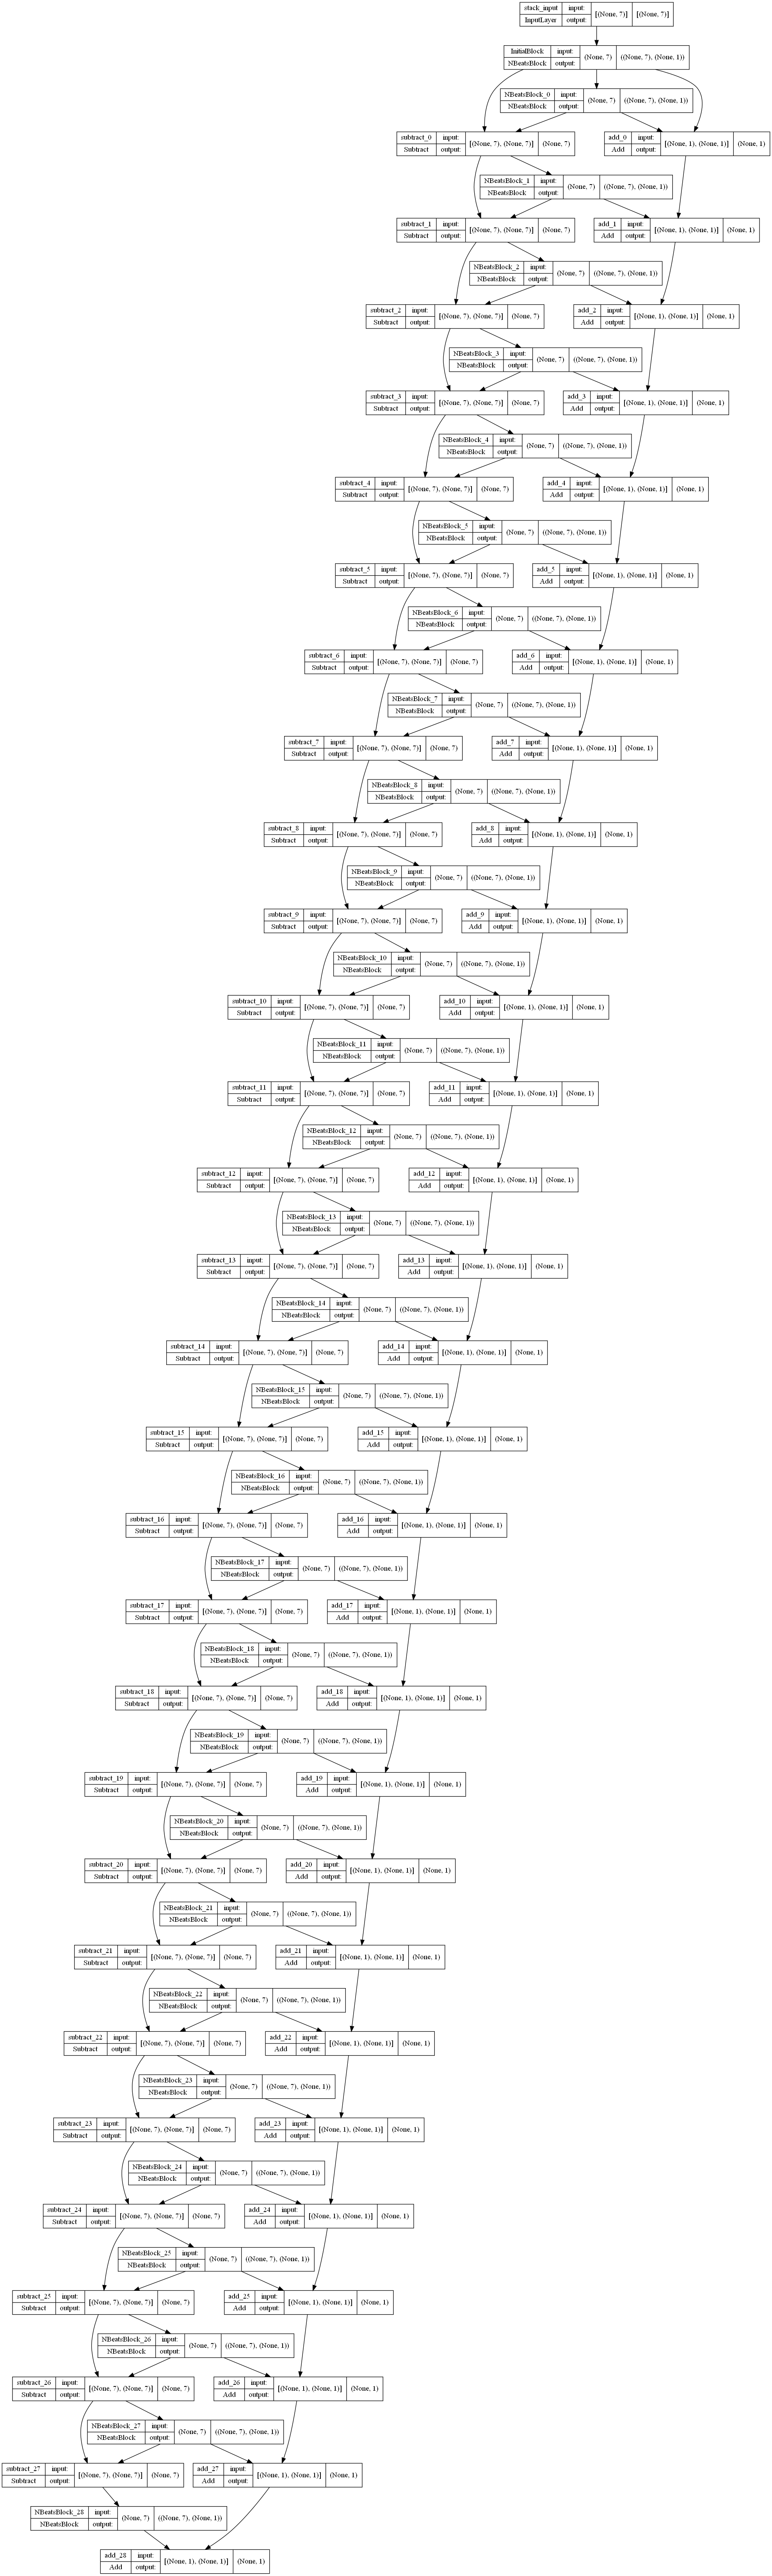

In [156]:
tf.keras.utils.plot_model(model_7, show_shapes=True)

In [157]:
# Evaluate the N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 46ms/step - loss: 576.1382


576.1382446289062

In [158]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8838.984, 8781.094, 9025.369, 8754.258, 8751.424, 8735.621,
       8656.984, 8500.497, 8469.333, 8509.526], dtype=float32)>

In [159]:
model_7_results = evaluate_model(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

tf.Tensor(576.13824, shape=(), dtype=float32)
tf.Tensor(569.2417, shape=(), dtype=float32)


{'mae': 576.13824,
 'mse': 1168998.6,
 'rmse': 1081.2024,
 'mape': 2.6236615,
 'mase': 1.0121154}

## Model 8: Ensemble (multiple models stacked together)

In [160]:
HORIZON, WINDOW_SIZE

(1, 7)

In [161]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
    """
    Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.
    """
    # Make empty list for trained ensemble models
    ensemble_models = []
    for i in range(num_iter):
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

            # Construct a simple model (similar to model_1)
            model = tf.keras.Sequential([
                # Initialize dense layers with normal distribution for extimating prediction intervals
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(HORIZON)
            ])

            model.compile(loss=loss_function,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae", "mse"])

            model.fit(train_data,
                      validation_data=test_data,
                      epochs=num_epochs,
                      verbose=0,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                  patience=200,
                                                                  restore_best_weights=True),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                      patience=100,
                                                                      verbose=1)])

            ensemble_models.append(model)

    return ensemble_models

In [162]:
%%time

ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 586: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 702: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 410: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 510: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 177: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 842: ReduceLROnPlateau reduci

In [163]:
len(ensemble_models)

15

In [168]:
# Make predictions with the ensemble model

def make_ensemble_preds(ensemble_models, data):
    ensemble_preds =[]
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [169]:
%%time

ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)

ensemble_preds

CPU times: total: 46.9 ms
Wall time: 421 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8740.817,  8741.402,  9014.591, ..., 50349.855, 49729.336,
        46378.555],
       [ 8750.   ,  8727.086,  9039.707, ..., 49288.33 , 48488.38 ,
        45322.49 ],
       [ 8745.424,  8733.031,  9101.386, ..., 49267.17 , 47660.434,
        45370.047],
       ...,
       [ 8816.27 ,  8723.047,  9075.803, ..., 49738.984, 49644.785,
        46437.84 ],
       [ 8728.957,  8804.533,  9103.334, ..., 49595.953, 48540.934,
        45049.863],
       [ 8817.104,  8761.019,  9040.183, ..., 49724.22 , 48054.86 ,
        45824.805]], dtype=float32)>

In [171]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8771.003 ,  8765.899 ,  9059.712 ,  8721.935 ,  8734.031 ,
        8705.487 ,  8655.129 ,  8467.279 ,  8445.054 ,  8518.013 ,
        8189.938 ,  8091.7197,  8038.872 ,  7616.1167,  7265.2656,
        7297.5415,  7085.814 ,  7207.762 ,  7103.919 ,  7531.116 ,
        7370.7344,  7741.0615,  7552.697 ,  7381.578 ,  7316.203 ,
        7304.664 ,  7200.883 ,  7384.646 ,  7500.552 ,  7530.093 ,
        7535.1626,  7316.187 ,  7219.7646,  7170.1655,  7182.7217,
        7227.1885,  7072.005 ,  7093.355 ,  6857.3647,  6574.6216,
        7400.165 ,  7165.723 ,  7164.5234,  7255.0293,  7259.7783,
        7191.5737,  7210.5938,  7200.8066,  7170.079 ,  7205.5356,
        7298.599 ,  7377.8105,  7236.0986,  7159.24  ,  7151.0347,
        6940.6562,  7275.6353,  7325.5444,  7356.4355,  7702.4453,
        8058.25  ,  8128.4565,  7850.719 ,  8086.2793,  8088.6978,
        8163.473 ,  8088.3765,  8739.755 ,  8884.6   ,  8765.2   ,
        8933.2

In [173]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median

array([ 8778.977 ,  8764.392 ,  9057.755 ,  8712.854 ,  8734.941 ,
        8708.523 ,  8647.513 ,  8471.24  ,  8446.96  ,  8514.916 ,
        8196.862 ,  8093.102 ,  8044.815 ,  7617.3984,  7263.7563,
        7284.0605,  7064.519 ,  7210.3906,  7115.2075,  7524.1187,
        7382.081 ,  7739.919 ,  7559.3467,  7382.9834,  7318.831 ,
        7304.0337,  7199.7056,  7385.468 ,  7498.3555,  7531.9204,
        7541.5454,  7320.4697,  7219.2993,  7175.138 ,  7182.785 ,
        7230.179 ,  7079.7124,  7097.9795,  6857.2583,  6572.919 ,
        7393.0684,  7166.7134,  7164.56  ,  7268.0654,  7238.2017,
        7200.5557,  7214.6436,  7195.5264,  7175.064 ,  7206.3027,
        7299.5884,  7379.093 ,  7241.019 ,  7167.777 ,  7151.7456,
        6944.472 ,  7267.66  ,  7320.4365,  7360.3237,  7710.3853,
        8050.885 ,  8115.4116,  7852.18  ,  8087.1816,  8097.146 ,
        8169.398 ,  8092.659 ,  8725.44  ,  8890.408 ,  8765.077 ,
        8941.424 ,  8949.209 ,  8663.132 ,  8624.554 ,  8679.5

In [176]:
ensemble_results = evaluate_model(y_true=y_test,
                                  y_pred=ensemble_preds)
ensemble_results

tf.Tensor(579.7077, shape=(), dtype=float32)
tf.Tensor(569.2417, shape=(), dtype=float32)


{'mae': 579.70764,
 'mse': 1181699.2,
 'rmse': 1086.8804,
 'mape': 2.6539638,
 'mase': 1.0183859}

In [174]:
ensemble_results = evaluate_model(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

tf.Tensor(568.0858, shape=(), dtype=float32)
tf.Tensor(569.2417, shape=(), dtype=float32)


{'mae': 568.0858,
 'mse': 1146684.0,
 'rmse': 1070.8334,
 'mape': 2.584485,
 'mase': 0.99796945}

In [177]:
ensemble_results = evaluate_model(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

tf.Tensor(566.74335, shape=(), dtype=float32)
tf.Tensor(569.2417, shape=(), dtype=float32)


{'mae': 566.74335,
 'mse': 1144396.0,
 'rmse': 1069.7644,
 'mape': 2.5754704,
 'mase': 0.9956111}

## Plotting the prediction intervals (uncertainty estimates)

- One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialized models
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/meduab of the prediction in (1)

In [182]:
# Find the upper and lower bounds of the ensemble predictions
def get_upper_lower(preds): # Take the predictions
    # Measure the standard deviation of the predictions
    std = tf.math.reduce_std(preds, axis=0)

    # Multiply the standard deviation by 1.96
    interval = 1.96 * std

    # Get the prediction interval upper and lower bounds
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    return lower, upper

In [183]:
lower, upper = get_upper_lower(ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8703.809 ,  8711.64  ,  8999.49  ,  8638.486 ,  8651.876 ,
         8641.821 ,  8593.345 ,  8386.827 ,  8395.082 ,  8476.696 ,
         8133.3916,  8043.8374,  7992.18  ,  7566.9204,  7198.513 ,
         7204.1035,  6961.999 ,  7136.4463,  7000.2095,  7447.0366,
         7293.3745,  7676.5244,  7472.7754,  7306.0864,  7257.5796,
         7256.1763,  7147.946 ,  7343.6084,  7455.462 ,  7487.834 ,
         7475.449 ,  7263.153 ,  7183.854 ,  7135.2427,  7142.646 ,
         7176.5894,  7023.127 ,  7048.9536,  6803.983 ,  6545.7256,
         7294.108 ,  7073.929 ,  7051.544 ,  7158.122 ,  7111.494 ,
         7089.207 ,  7166.7295,  7162.4824,  7132.774 ,  7159.4424,
         7258.1104,  7338.0806,  7180.0083,  7113.632 ,  7118.2007,
         6905.4883,  7229.896 ,  7274.749 ,  7302.4233,  7616.161 ,
         7973.812 ,  8065.951 ,  7787.357 ,  8010.608 ,  8009.0137,
         8125.314 ,  8009.6963,  8679.423 ,  8793.169 ,  8675.545 ,

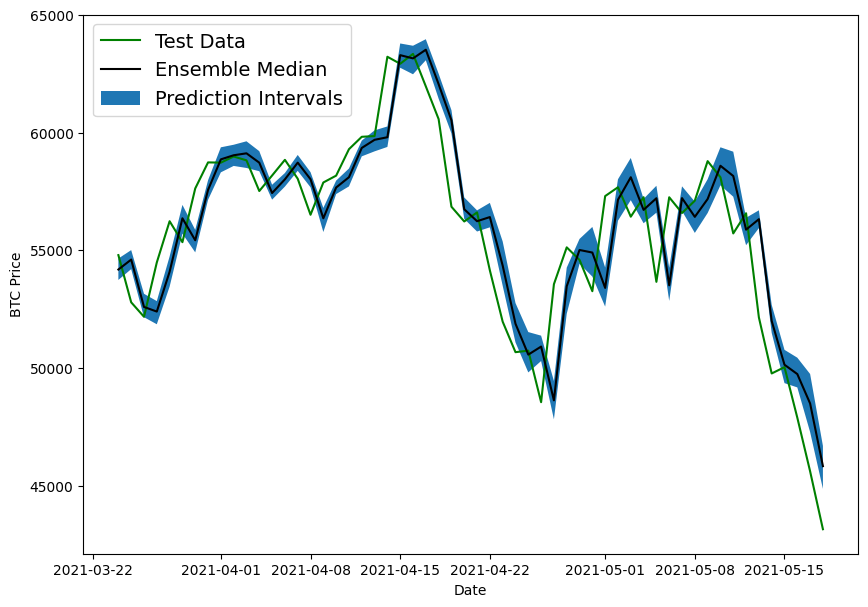

In [186]:
# Plot the median of the ensemble preds with the prediction intervals
offset = 500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)

There are two major types of uncertainty in machine learning:
1. Aleatoric uncertainty - this type of uncertainty cannot be reduced and it is often referred as data uncertainty or subway uncertainty
2. Epistemic uncertainty - this type of uncertainty can be reduced, it also referred to as model or coconut uncertainty

## Model 9: Future prediction model

In [190]:
bit_prices_windowed.head()

,Price,block_reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [191]:
HORIZON = 1
WINDOW_SIZE = 7

In [194]:
X_all = bit_prices_windowed.dropna().drop(["Price", "block_reward"], axis =1).to_numpy()
y_all = bit_prices_windowed.dropna()["Price"].to_numpy()

In [195]:
len(X_all), len(y_all)

(2780, 2780)

In [196]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))
dataset_all = dataset_all.batch(1024).prefetch(tf.data.AUTOTUNE)

In [197]:
dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [202]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(7,), dtype=tf.float64)
x = layers.Dense(128, kernel_initializer="he_normal", activation="relu")(inputs)
x = layers.Dense(128, kernel_initializer="he_normal", activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)

model_9 = tf.keras.Model(inputs, outputs, name="model_9_full")

model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_9_history = model_9.fit(dataset_all,
                              epochs=100,
                              verbose=0,
                              callbacks=[checkpoint_callback(model_name=model_9.name), # Unable to save due to the function set to monitor on val_loss while now is training on full dataset without validation data
                                         tensorboard_callback(model_name=model_9.name)])

## Make predictions into the future

In [203]:
INTO_FUTURE = 14

In [229]:
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
    """
    Make future forecast into_future steps after values ends.

    Returns future forecast as a list of floats.
    """
    # Create an empty list for future forecasts/prepare data to forecast on
    future_forecast = []
    last_window = values[-WINDOW_SIZE:]

    # Mkae INTO_FUTURE number of predictions, altering the data which gets predicted on each
    for _ in range(INTO_FUTURE):
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

        # Append predictions to future forecast
        future_forecast.append(tf.squeeze(future_pred).numpy())

        # Update the last window with the new pred an get WINDOW_SIZE most recent preds
        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
    return future_forecast

In [230]:
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 56829.875

Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56829.875     ] -> Prediction: 49848.4375

Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56829.875      49848.4375    ] -> Prediction: 51128.05078125

Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56829.875      49848.4375     51128.05078125] -> Prediction: 49027.46875

Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 56829.875
 49848.4375     51128.05078125 49027.46875   ] -> Prediction: 46633.8515625

Predicting on:
 [45604.61575361 43144.47129086 56829.875      49848.4375
 51128.05078125 49027.46875    46633.8515625 ] -> Prediction: 46684.06640625

Predicting on:
 [43144.47129086 56829.875      49848.4375     51128.05078125
 49027.46875   

## Plot future forecase

In [231]:
future_forecast

[56829.875,
 49848.438,
 51128.05,
 49027.47,
 46633.85,
 46684.066,
 41955.31,
 57997.285,
 45616.883,
 52981.83,
 47640.8,
 46573.227,
 47582.12,
 40466.176]

In [232]:
def get_future_dates(start_date, into_future, offset=1):
    """
    Returns array of datetime values ranging from start_date to start_date+into_future
    """
    start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for date
    end_date = start_date + np.timedelta64(into_future, "D") # specify end date
    return np.arange(start_date, end_date, dtype="datetime64[D]")

In [234]:
last_timestep = bit_prices.index[-1]
type(last_timestep)

pandas._libs.tslibs.timestamps.Timestamp

In [235]:
next_time_steps = get_future_dates(last_timestep, INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

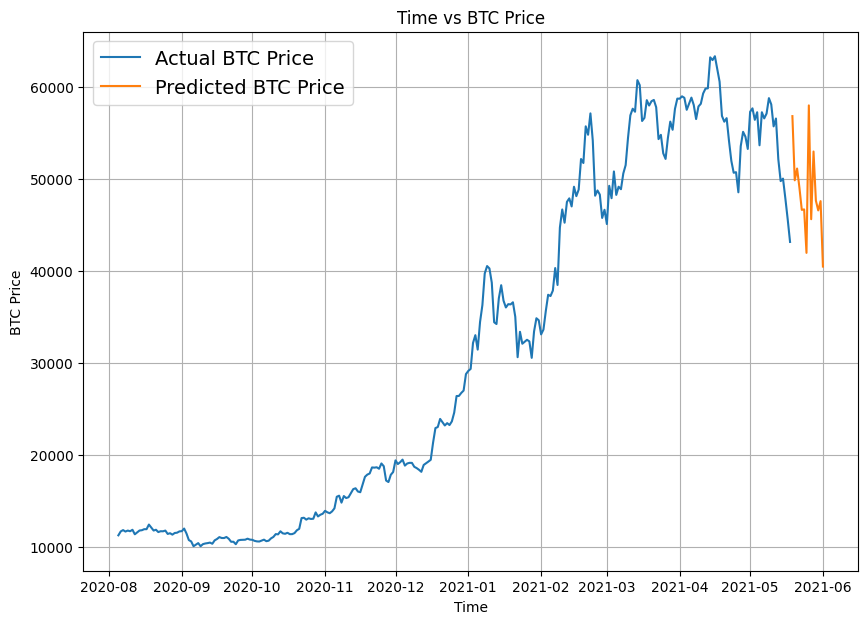

In [236]:
plt.figure(figsize=(10, 7))
plot_figure(bit_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_figure(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

In [237]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

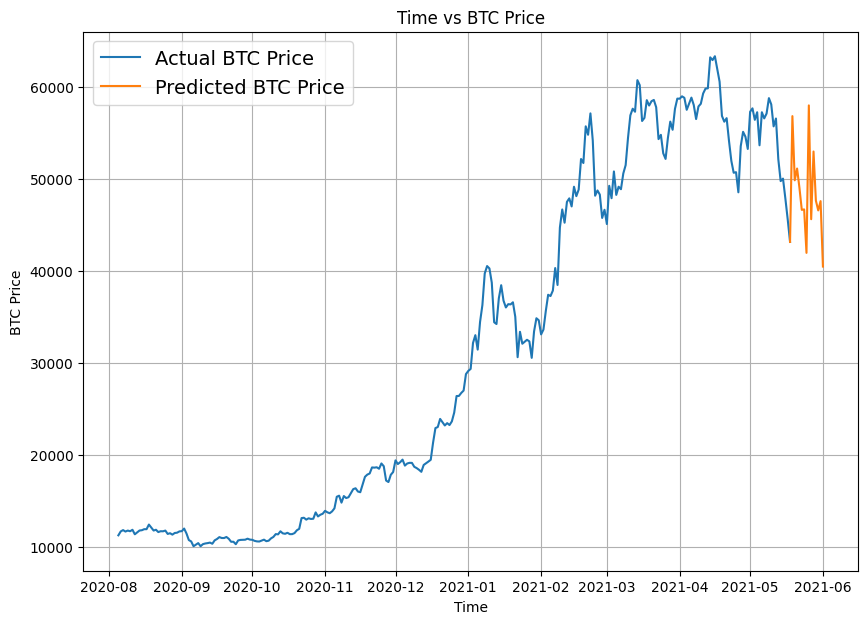

In [238]:
plt.figure(figsize=(10, 7))
plot_figure(bit_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_figure(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Turkey Data

In [241]:
# Introducing a turkey problem
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [243]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [245]:
btc_date_turkey = np.array(bit_prices.index)
btc_date_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

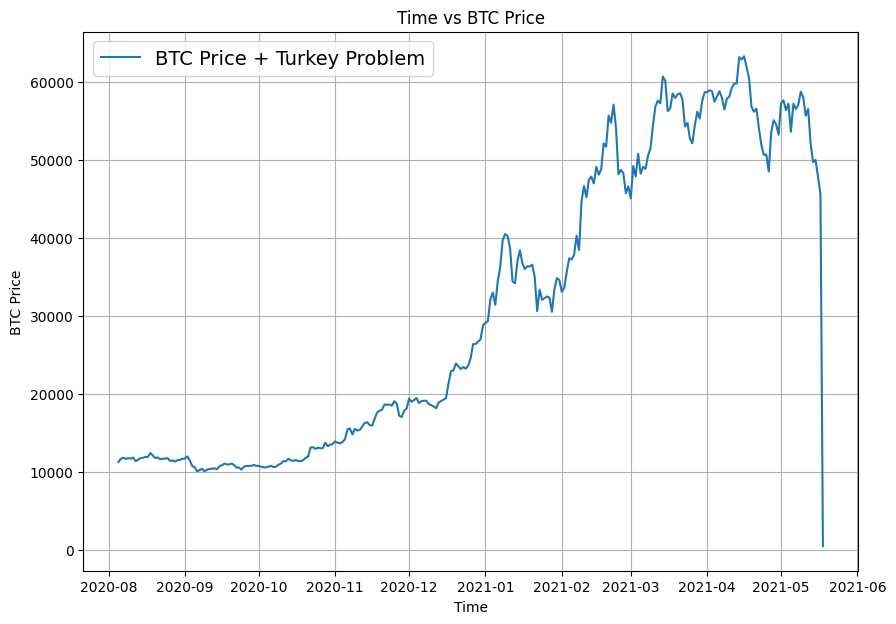

In [246]:
plt.figure(figsize=(10, 7))
plot_figure(timesteps=btc_date_turkey,
            values=btc_price_turkey,
            format="-",
            label="BTC Price + Turkey Problem",
            start=2500)

In [247]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_split(full_windows, full_labels)

len(X_train), len(X_test), len(y_train), len(y_test)

[[0 1 2 3 4 5 6 7]]
[[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [2777 2778 2779 ... 2782 2783 2784]
 [2778 2779 2780 ... 2783 2784 2785]
 [2779 2780 2781 ... 2784 2785 2786]]
[[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361   431.44471291]]


(2224, 556, 2224, 556)

In [248]:
model_10 = tf.keras.models.clone_model(model_1)
model_10.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [249]:
model_10._name = "model_10_turkey"

model_10.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam())

model_10_history = model_10.fit(X_train,
                                y_train,
                                validation_data=(X_test, y_test),
                                epochs=100,
                                verbose=0,
                                batch_size=128,
                                callbacks=[checkpoint_callback(model_name=model_10.name)])

In [250]:
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 7ms/step - loss: 726.2997


726.2997436523438

In [251]:
model_10 = tf.keras.models.load_model("model_experiments/model_10_turkey")
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 639.8118


639.8118286132812

In [252]:
model_10_preds = make_preds(model_10, X_test)
model_10_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8837.745, 8773.519, 9021.024, 8768.071, 8743.992, 8724.443,
       8659.642, 8530.103, 8443.011, 8519.257], dtype=float32)>

In [254]:
model_10_results = evaluate_model(y_test, model_10_preds)
model_10_results

tf.Tensor(17125.605, shape=(), dtype=float32)
tf.Tensor(646.2022, shape=(), dtype=float32)


{'mae': 17125.605,
 'mse': 614175550.0,
 'rmse': 23707.479,
 'mape': 121.308075,
 'mase': 26.50193}

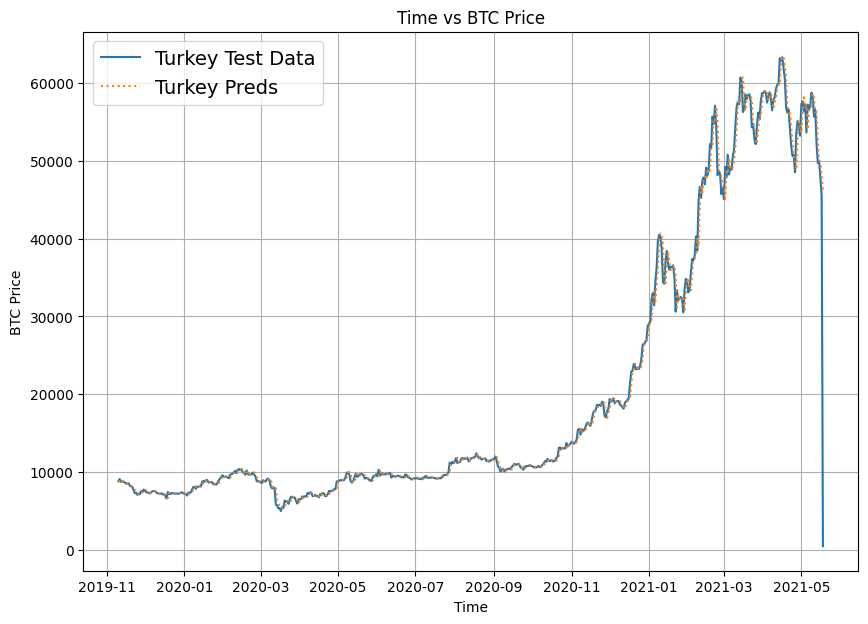

In [257]:
plt.figure(figsize=(10, 7))
offset=0
plot_figure(timesteps=btc_date_turkey[-len(X_test):],
            values=btc_price_turkey[-len(y_test):],
            format="-",
            label="Turkey Test Data",
            start=offset)
plot_figure(timesteps=btc_date_turkey[-len(X_test):],
            values=model_10_preds,
            label="Turkey Preds",
            start=offset)

In [262]:
models_results = pd.DataFrame({"model_0": naive_results,
                               "model_1_dense_w7_h1": model_1_results,
                               "model_2_w30_h1": model_2_results,
                               "model_3_w30_h7": model_3_results,
                               "model_4_CONV1D": model_4_results,
                               "model_5_LSTM": model_5_results,
                               "model_6_multivariate": model_6_results,
                               "model_7_NBEATS": model_7_results,
                               "model_8_ensemble": ensembel_results,
                               "model_10_turkey": model_10_results})

models_results = models_results.T

In [263]:
models_results

,mae,mse,rmse,mape,mase
model_0,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,579.724304,1.216031e+06,1102.737793,2.600278,1.018415
model_2_w30_h1,608.961975,1.281441e+06,1132.007324,2.769341,1.064471
model_3_w30_h7,1242.641846,5.456084e+06,1427.821411,5.610530,2.211212
model_4_CONV1D,570.738708,1.183500e+06,570.738708,2.546120,1.002630
model_5_LSTM,597.462341,1.275416e+06,1129.343140,2.691097,1.049576
model_6_multivariate,568.035950,1.166216e+06,1079.914795,2.546599,0.997882
model_7_NBEATS,576.138245,1.168999e+06,1081.202393,2.623662,1.012115
model_8_ensemble,579.707642,1.181699e+06,1086.880371,2.653964,1.018386
model_10_turkey,17125.605469,6.141756e+08,23707.478516,121.308075,26.501930


<Axes: >

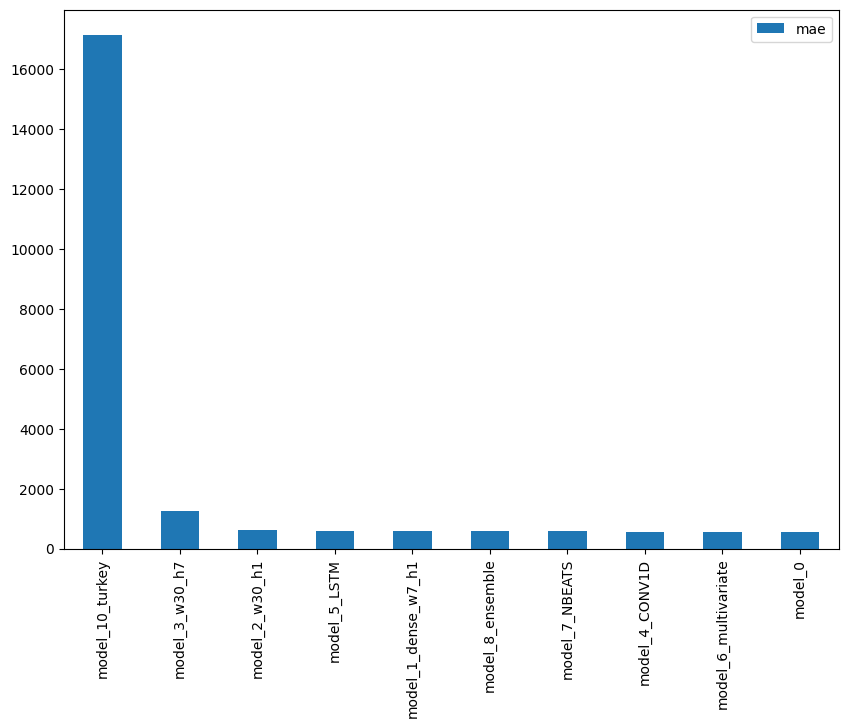

In [266]:
models_results[["mae"]].sort_values(by="mae", ascending=False).plot(figsize=(10, 7), kind="bar")

# What can we predict?
1. How well we understand the factors that contribute to it?
2. How much data is available?
3. How similar the future is to the past?
4. Whether the forecast can affect the thing we are trying to forecast?